In [1]:
import pandas as pd
import numpy as np

from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

from src.datasets import daocensus_text
import src.utils.notebooks as nbutils

sns.set_theme()
plt.rcParams['figure.dpi'] = 600

In [2]:
# 'ORG_NAME', 'ORG_PLATFORM', 'SPLITS_FREQ', 'SPLITS_NORMALIZE', 'LAST_SPLITS', 'USE_ORG_NAMES'

ORG_NAME = 'gm DAO'
ORG_PLATFORM = 'snapshot'
USE_ORG_NAMES = True

# Not used
SPLITS_FREQ = ...
SPLITS_NORMALIZE = ...
LAST_SPLITS = ...
CUTOFF_DATE_STR = ...

In [3]:
# Parameters
ORG_NAME = "MetaCartel - MetaCartel Ventures"
ORG_PLATFORM = ["daohaus", "snapshot"]
SPLITS_FREQ = "W-THU"
SPLITS_NORMALIZE = True
LAST_SPLITS = 10
USE_ORG_NAMES = True
EXECUTION_ID = "2024-03-01 21:00"
CUTOFF_DATE_STR = "2022-07-22"


In [4]:
dfv, dfp = daocensus_text.get('./data/daos-census-text', ORG_NAME, ORG_PLATFORM, use_org_names=USE_ORG_NAMES)
dfp = dfp.set_index('id')
print(dfv.info())
print(dfp.info())

Warning, removing 3287 votes without proposal
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3287 entries, 0 to 3286
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   platform       3287 non-null   object        
 1   name           3287 non-null   object        
 2   id             3287 non-null   object        
 3   proposal       3287 non-null   category      
 4   deployment     3287 non-null   object        
 5   platform_vote  3287 non-null   object        
 6   voter          3287 non-null   category      
 7   date           3287 non-null   datetime64[ns]
 8   choice         3287 non-null   object        
 9   weight         2868 non-null   float64       
dtypes: category(2), datetime64[ns](1), float64(1), object(6)
memory usage: 252.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 934 entries, c3900c37-f5f8-5398-898c-99f14906b437 to 94bd21d2-f261-5037-a18c-d8121b0975c

# Exploración de datos de Decentraland

In [5]:
print(f"{ORG_NAME} tiene {len(dfv)} votos de {dfv['voter'].nunique()} voters en {dfv['proposal'].nunique()} propuestas")

MetaCartel - MetaCartel Ventures tiene 3287 votos de 157 voters en 934 propuestas


In [6]:
dfd = dfp[['platform', 'name', 'platform_deployment']].drop_duplicates()
dfd

platform  \
id                                               
c3900c37-f5f8-5398-898c-99f14906b437  snapshot   
a3cd7b01-435c-50cd-8d8c-75102df1027c   daohaus   
adac78b1-860c-538d-a00f-5004ef9e4c91   daohaus   
a8c56b84-5087-5975-a5c5-02d41ef723cd   daohaus   

                                                                  name  \
id                                                                       
c3900c37-f5f8-5398-898c-99f14906b437  MetaCartel - MetaCartel Ventures   
a3cd7b01-435c-50cd-8d8c-75102df1027c  MetaCartel - MetaCartel Ventures   
adac78b1-860c-538d-a00f-5004ef9e4c91  MetaCartel - MetaCartel Ventures   
a8c56b84-5087-5975-a5c5-02d41ef723cd  MetaCartel - MetaCartel Ventures   

                                                             platform_deployment  
id                                                                                
c3900c37-f5f8-5398-898c-99f14906b437                                     mcv.eth  
a3cd7b01-435c-50cd-8d8c-75102df1027c  0x0372f3696fa7dc99801f435fd6737e57818239f2  
adac78b1-860c-538d-a00f-5004ef9e4c91  0x4570b4faf71e23942b8b9f934b47ccedf7540162  
a8c56b84-5087-5975-a5c5-02d41ef723cd  0xb152b115c94275b54a3f0b08c1aa1d21f32a659a

## Histograma de votos por usuario

157
8
count    157.000000
mean      20.936306
std       34.429914
min        1.000000
50%        9.000000
90%       45.800000
95%       91.800000
99%      155.760000
max      224.000000
dtype: float64


Cannot show ipywidgets in text

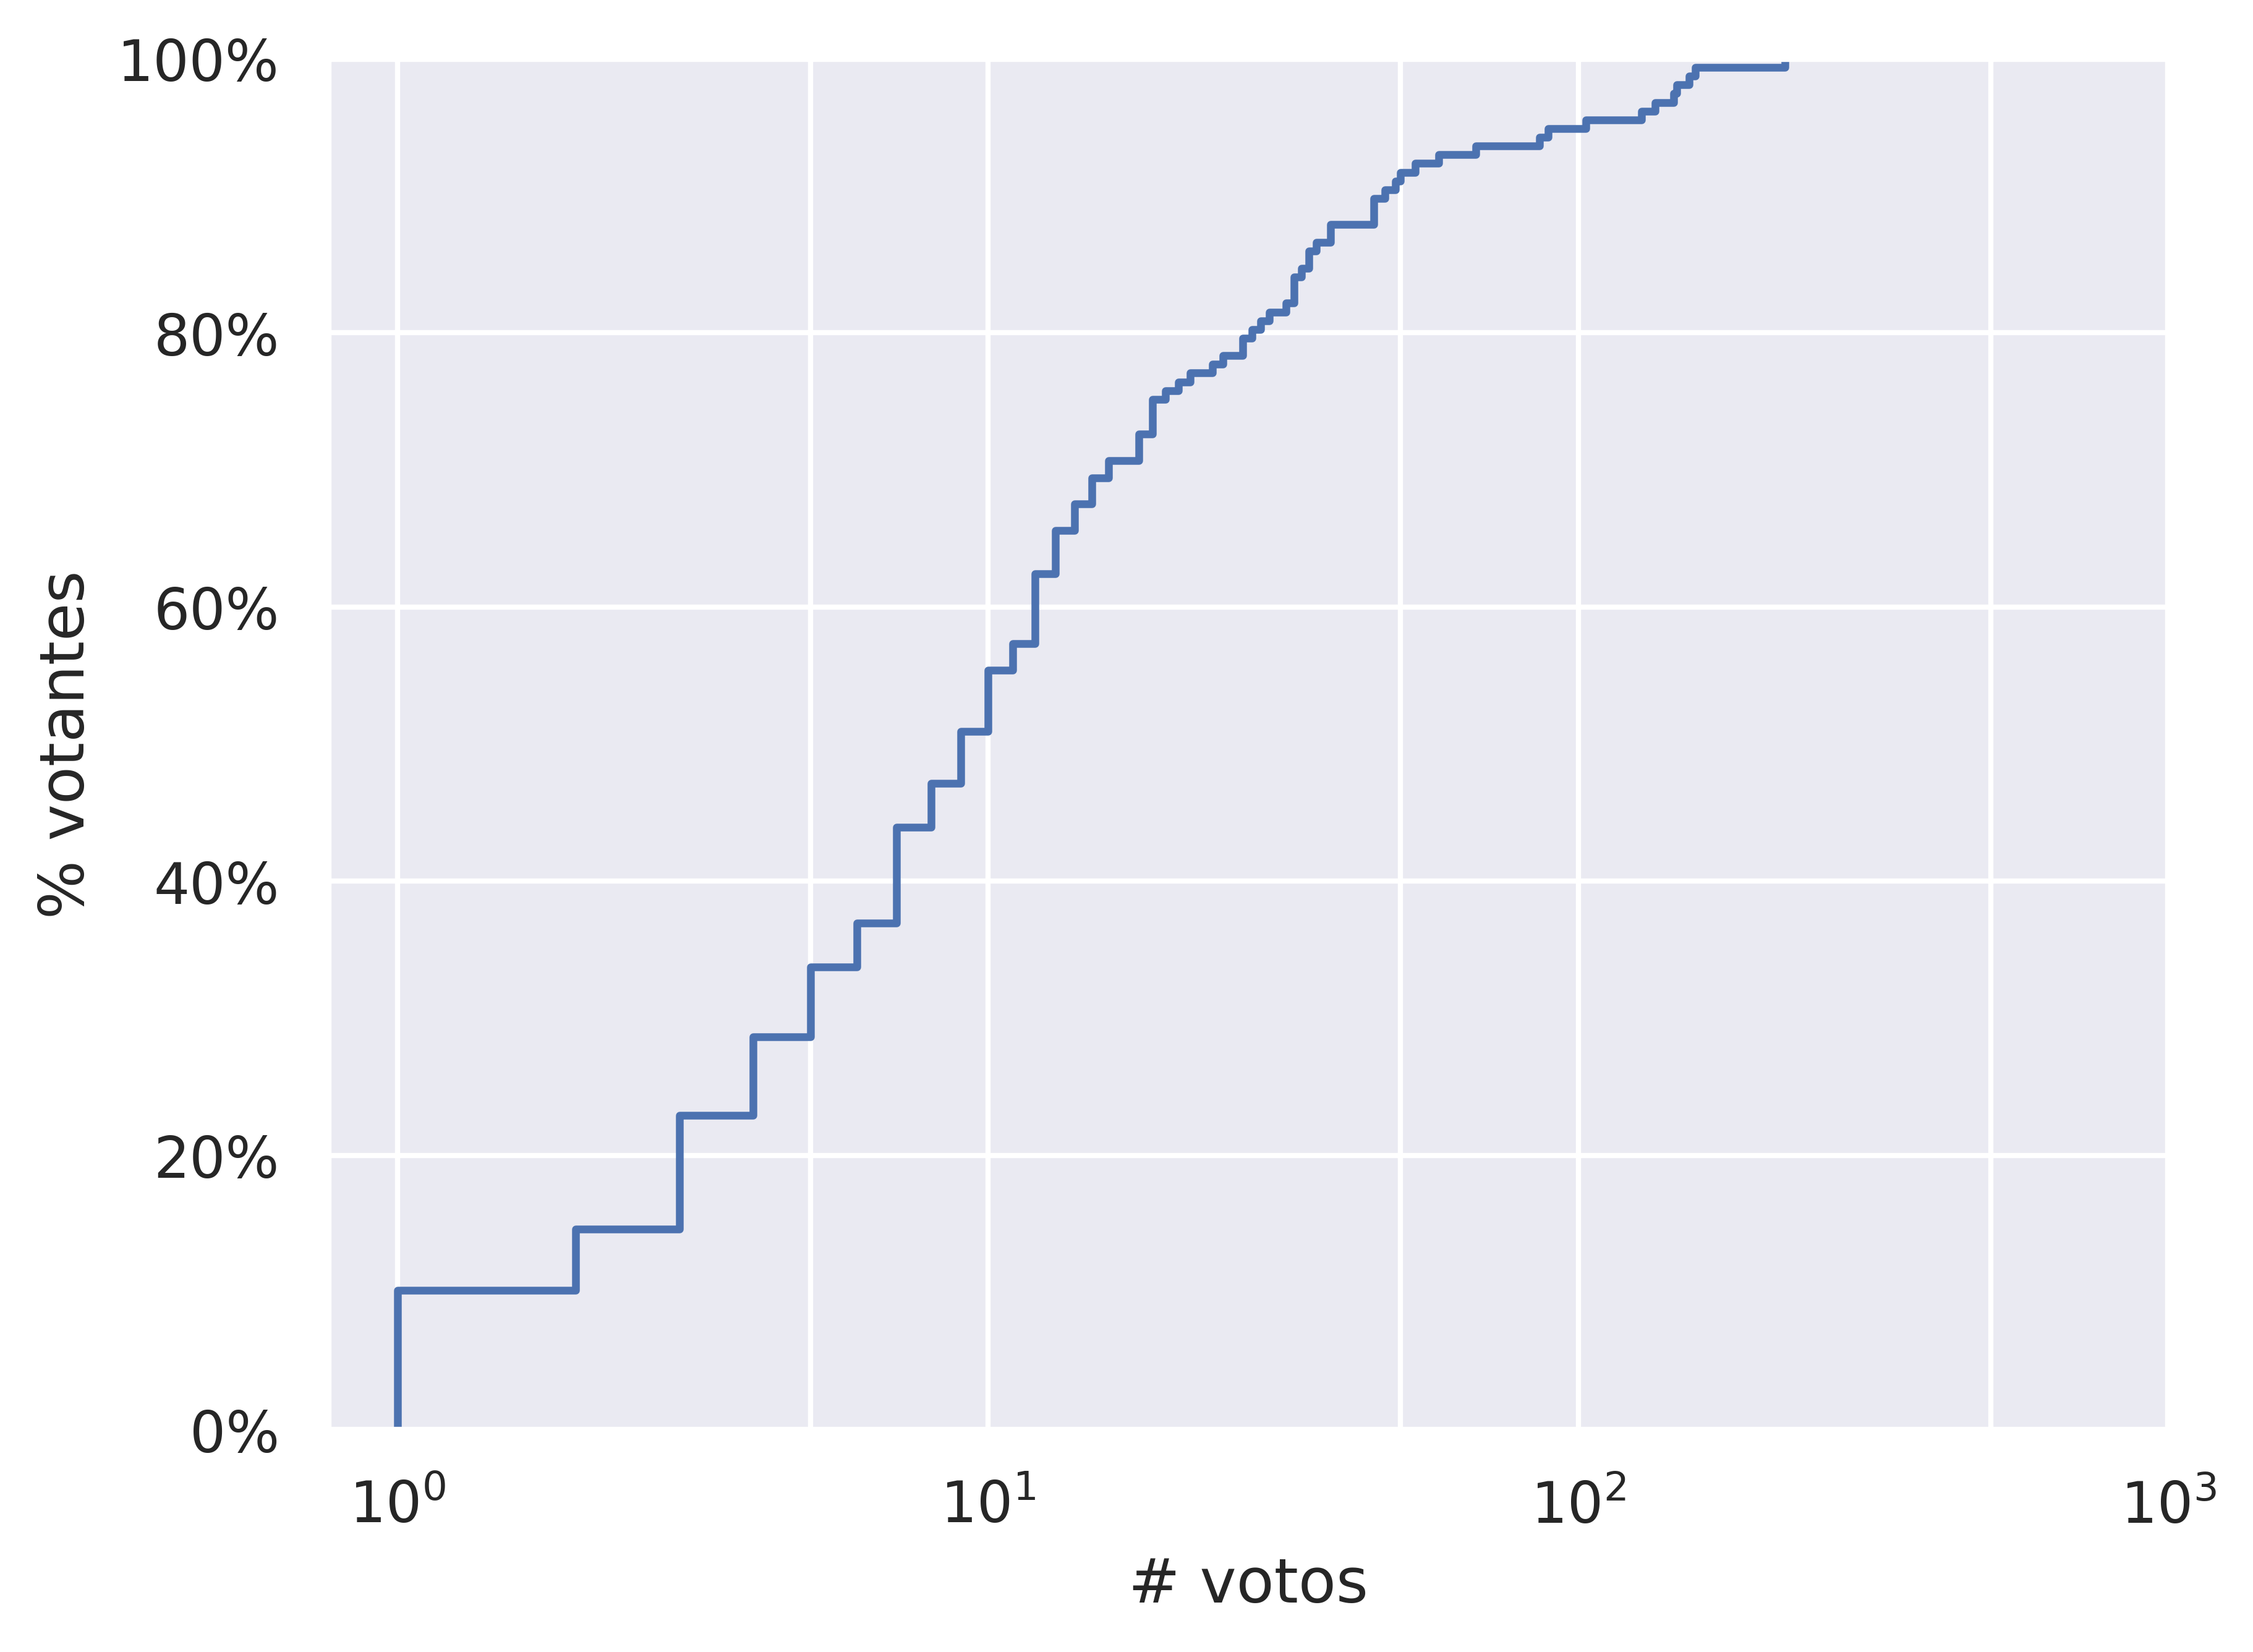

In [7]:
_toplot = dfv.groupby('voter').size()
# _toplot = _toplot[_toplot < 40]
print( len(_toplot) )
print( (_toplot > 100).sum() )
print(_toplot.describe(percentiles=[.5, .9, .95, .99]))
# _toplot.plot.hist(log=True)
ax = sns.ecdfplot(_toplot, log_scale=True)
plt.xlabel('# votos')
plt.ylabel('% votantes')

ax.set_xticks([1, 5, 10, 50, 100, 500, 1000])
# ax.xaxis.set_major_locator(mtick.MultipleLocator(10))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
nbutils.download_matplotlib(ax.figure, f'04_hybrid_ecdf_voters_{ORG_NAME}.pdf')

## Histograma de votos por propuesta

count    934.000000
mean       3.519272
std        3.646954
min        1.000000
50%        2.000000
75%        5.000000
90%        9.000000
95%       11.000000
99%       16.000000
max       27.000000
Name: votes_count, dtype: float64
0


Cannot show ipywidgets in text

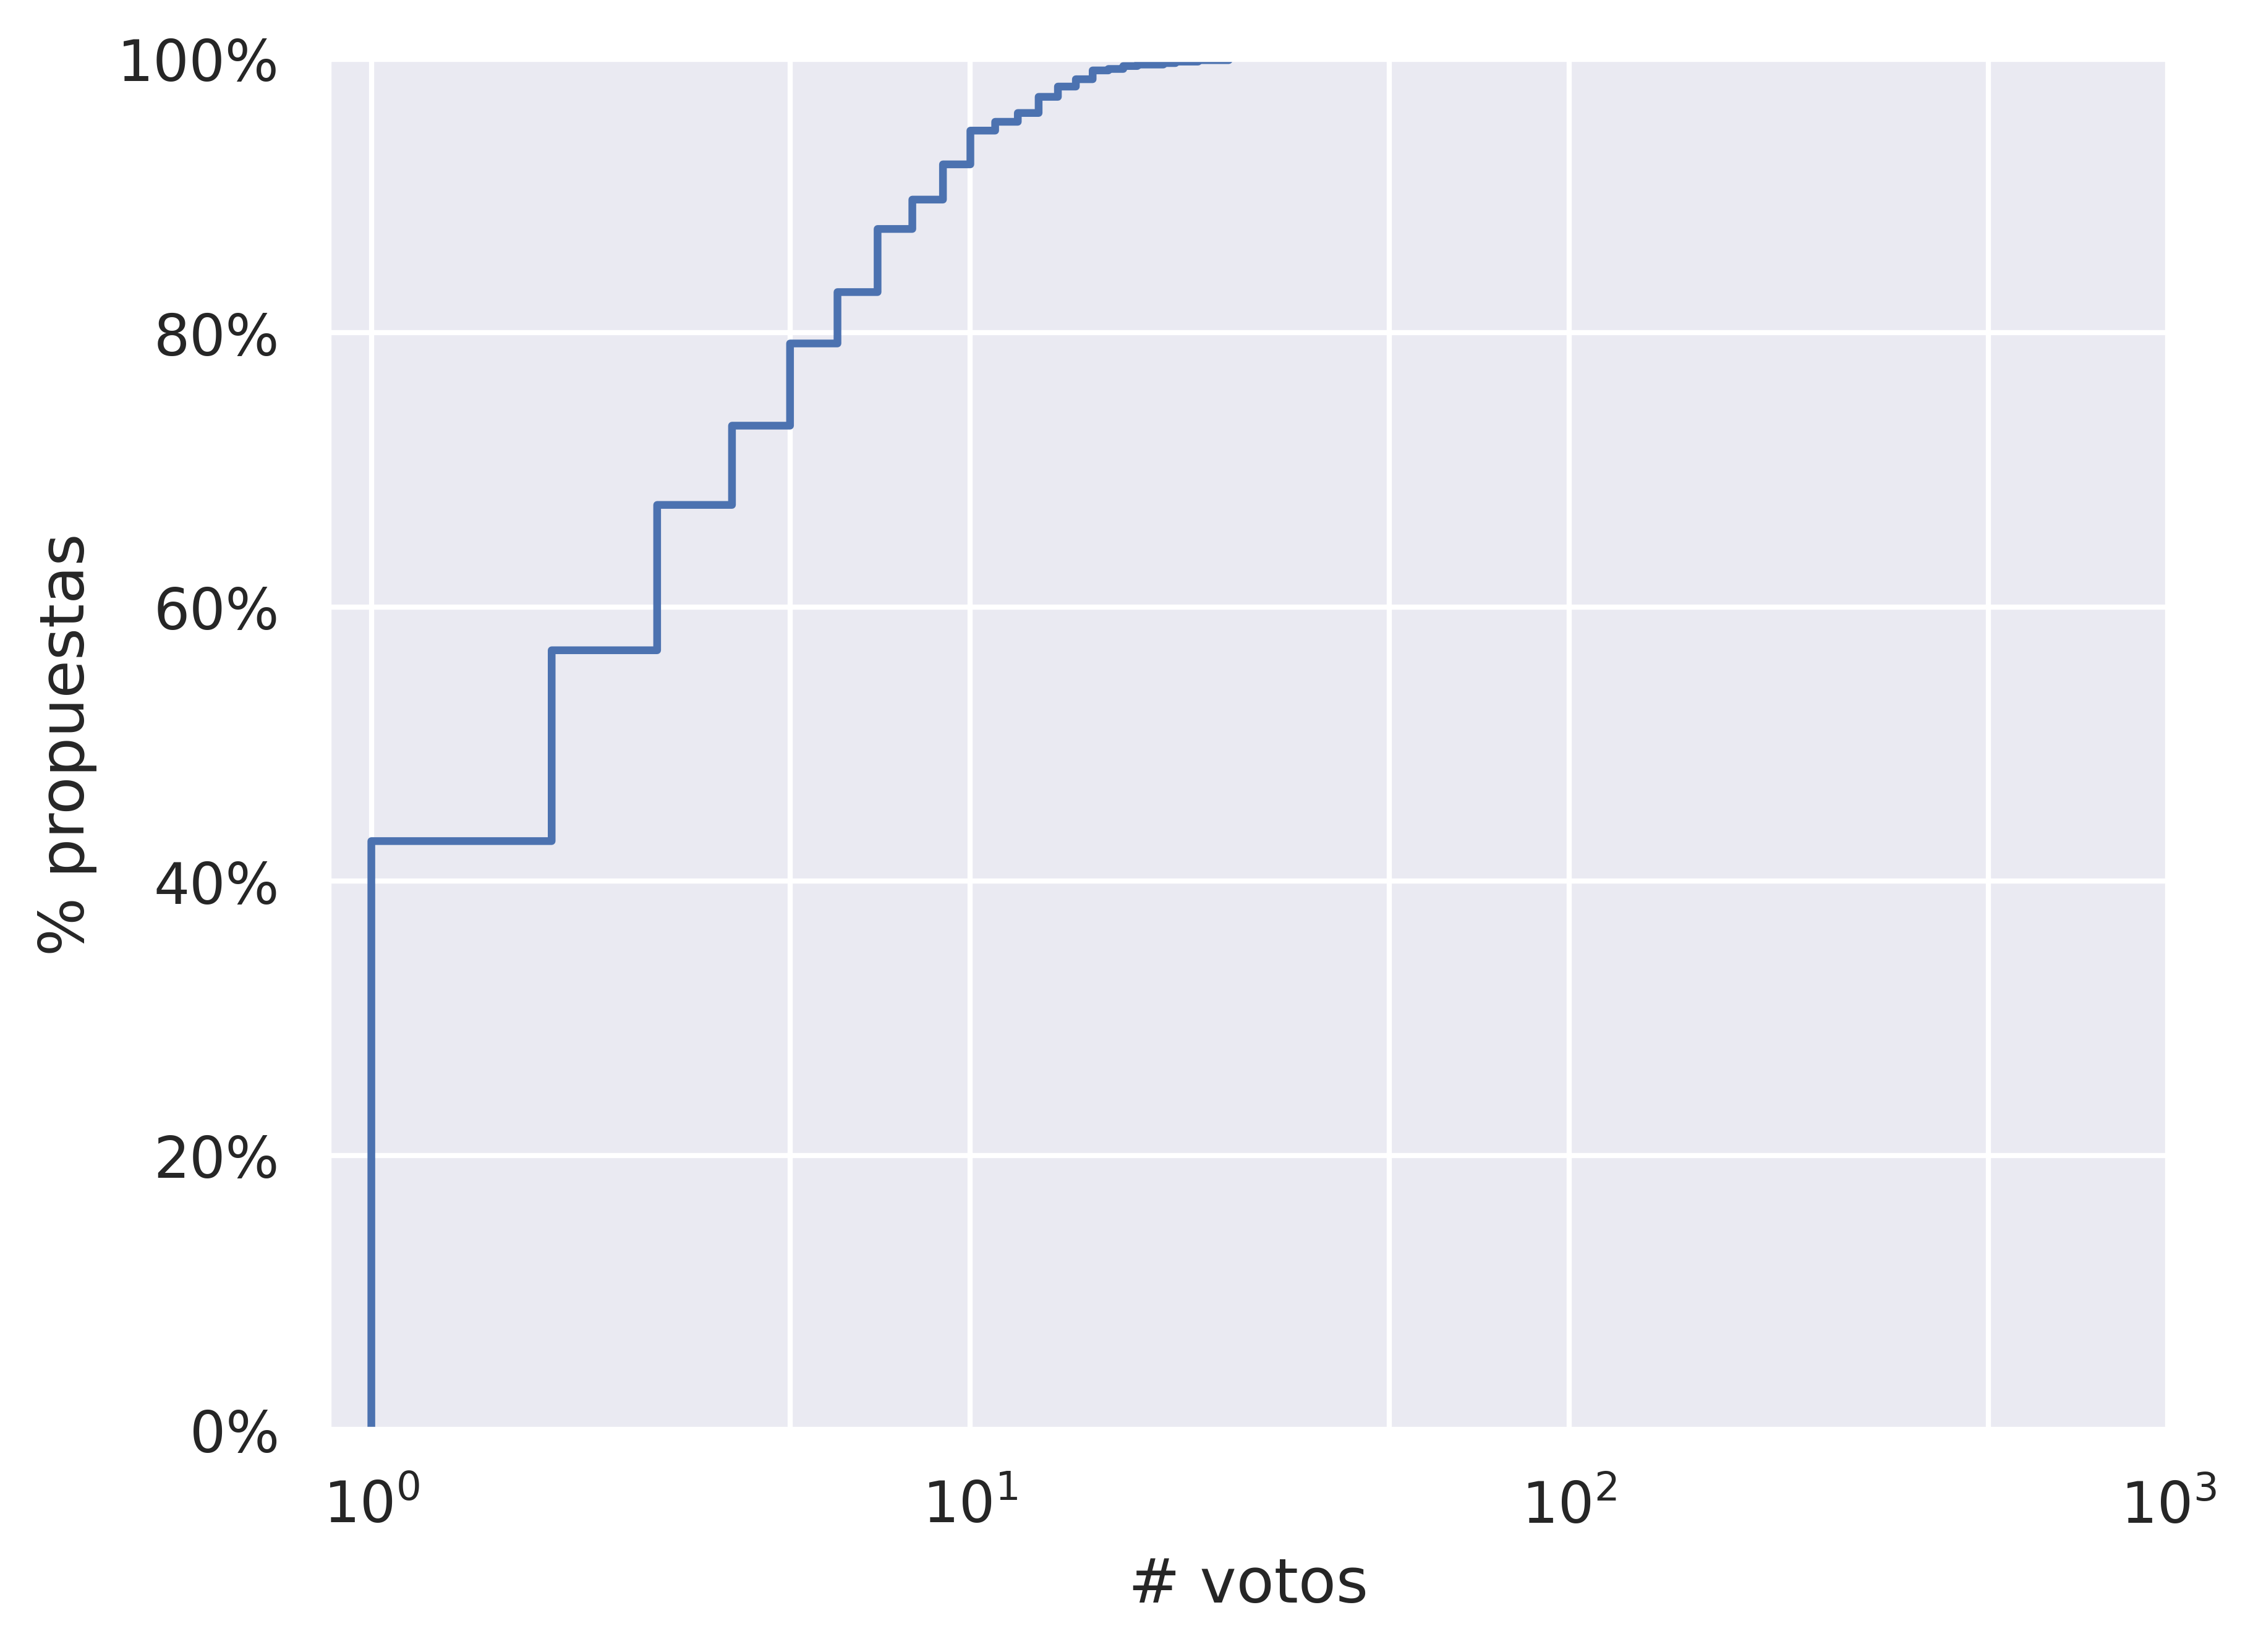

In [8]:
_toplot = dfp['votes_count']
print(_toplot.describe(percentiles=[.5,.75,.9, .95, .99]))
print( (_toplot > 300).sum() )

ax = sns.ecdfplot(_toplot, log_scale=True)
ax.set_xticks([1, 5, 10, 50, 100, 500, 1000])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.xlabel('# votos')
plt.ylabel('% propuestas')

nbutils.download_matplotlib(ax.figure, f'04_hybrid_ecdf_proposals_{ORG_NAME}.pdf')

count    934.000000
mean       3.519272
std        3.646954
min        1.000000
50%        2.000000
75%        5.000000
90%        9.000000
95%       11.000000
99%       16.000000
max       27.000000
dtype: float64
0


<Axes: ylabel='Proportion'>

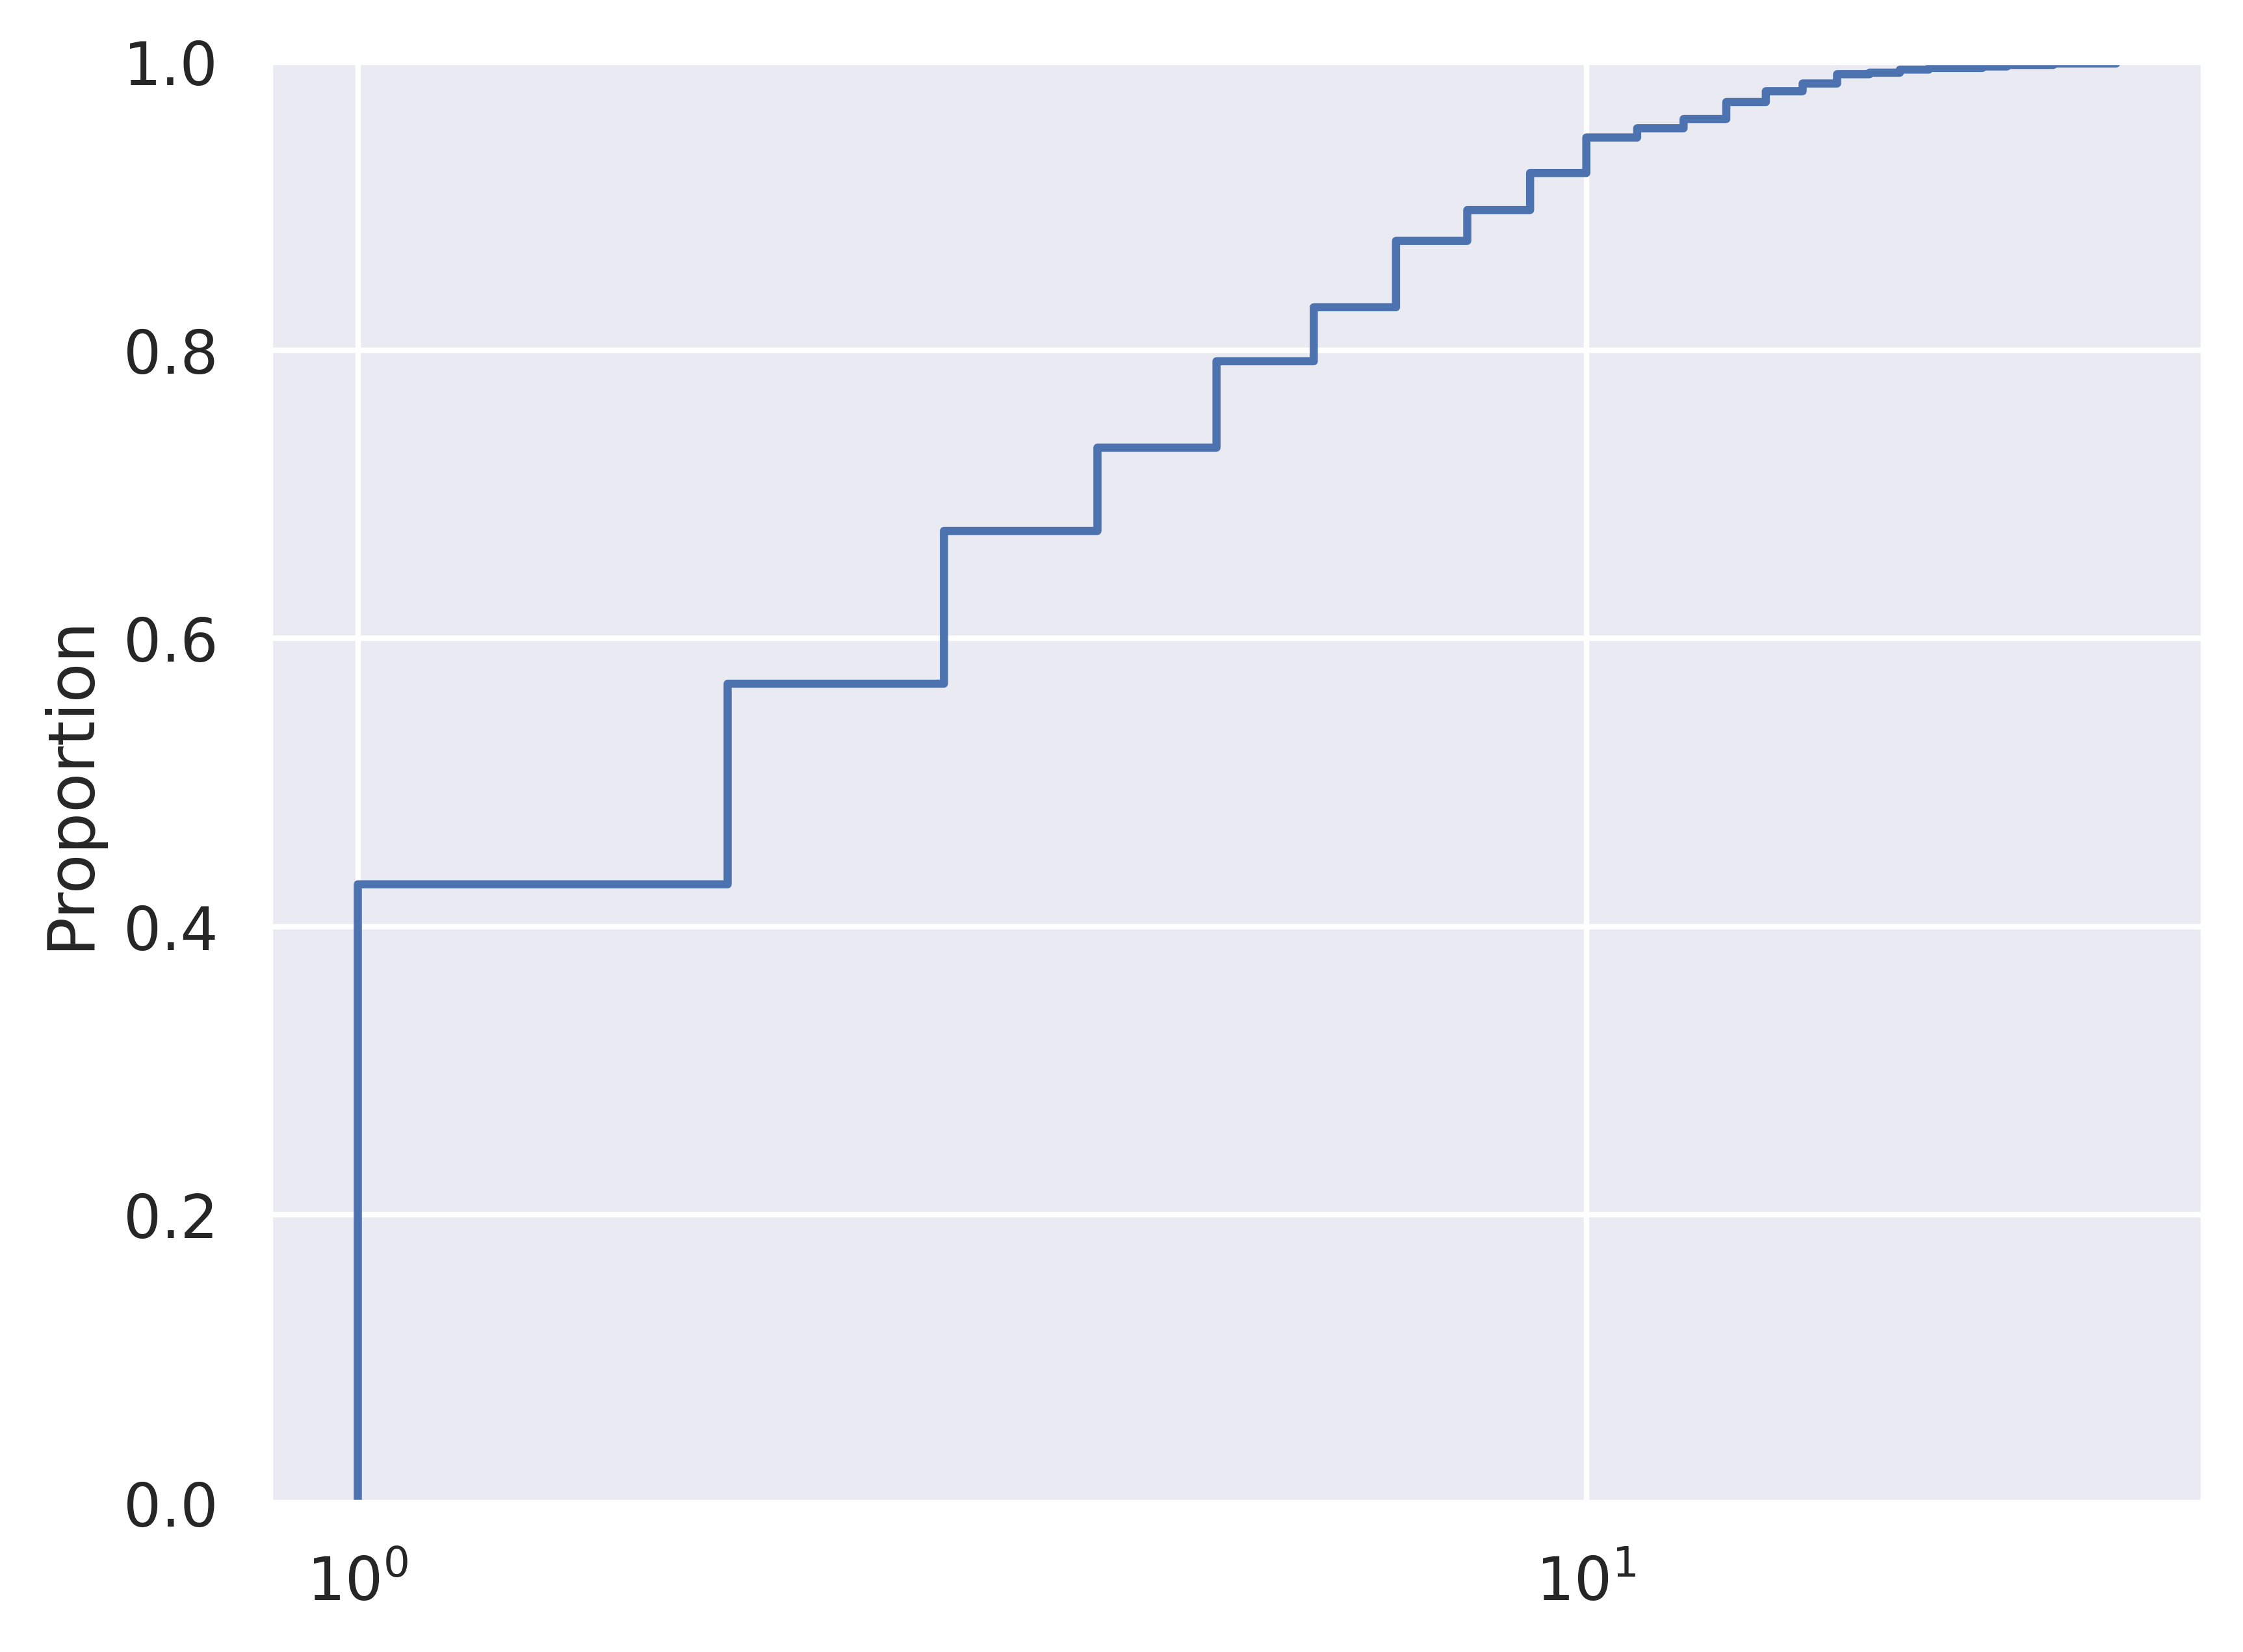

In [9]:
_toplot = dfv.groupby('proposal').size()
print(_toplot.describe(percentiles=[.5,.75,.9, .95, .99]))
print( (_toplot > 300).sum() )
sns.ecdfplot(_toplot, log_scale=True)

### Usuarios activos

In [10]:
# dfv.set_index('date').sort_index()['voter'].tolist()
# for x in dfv.set_index('date').sort_index()['voter'].items():
#     print(x)

/tmp/ipykernel_324161/3928196604.py:2: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


  0%|          | 0/3287 [00:00<?, ?it/s]

2019-06-06 09:49:38 2023-07-08 22:08:35


Cannot show ipywidgets in text

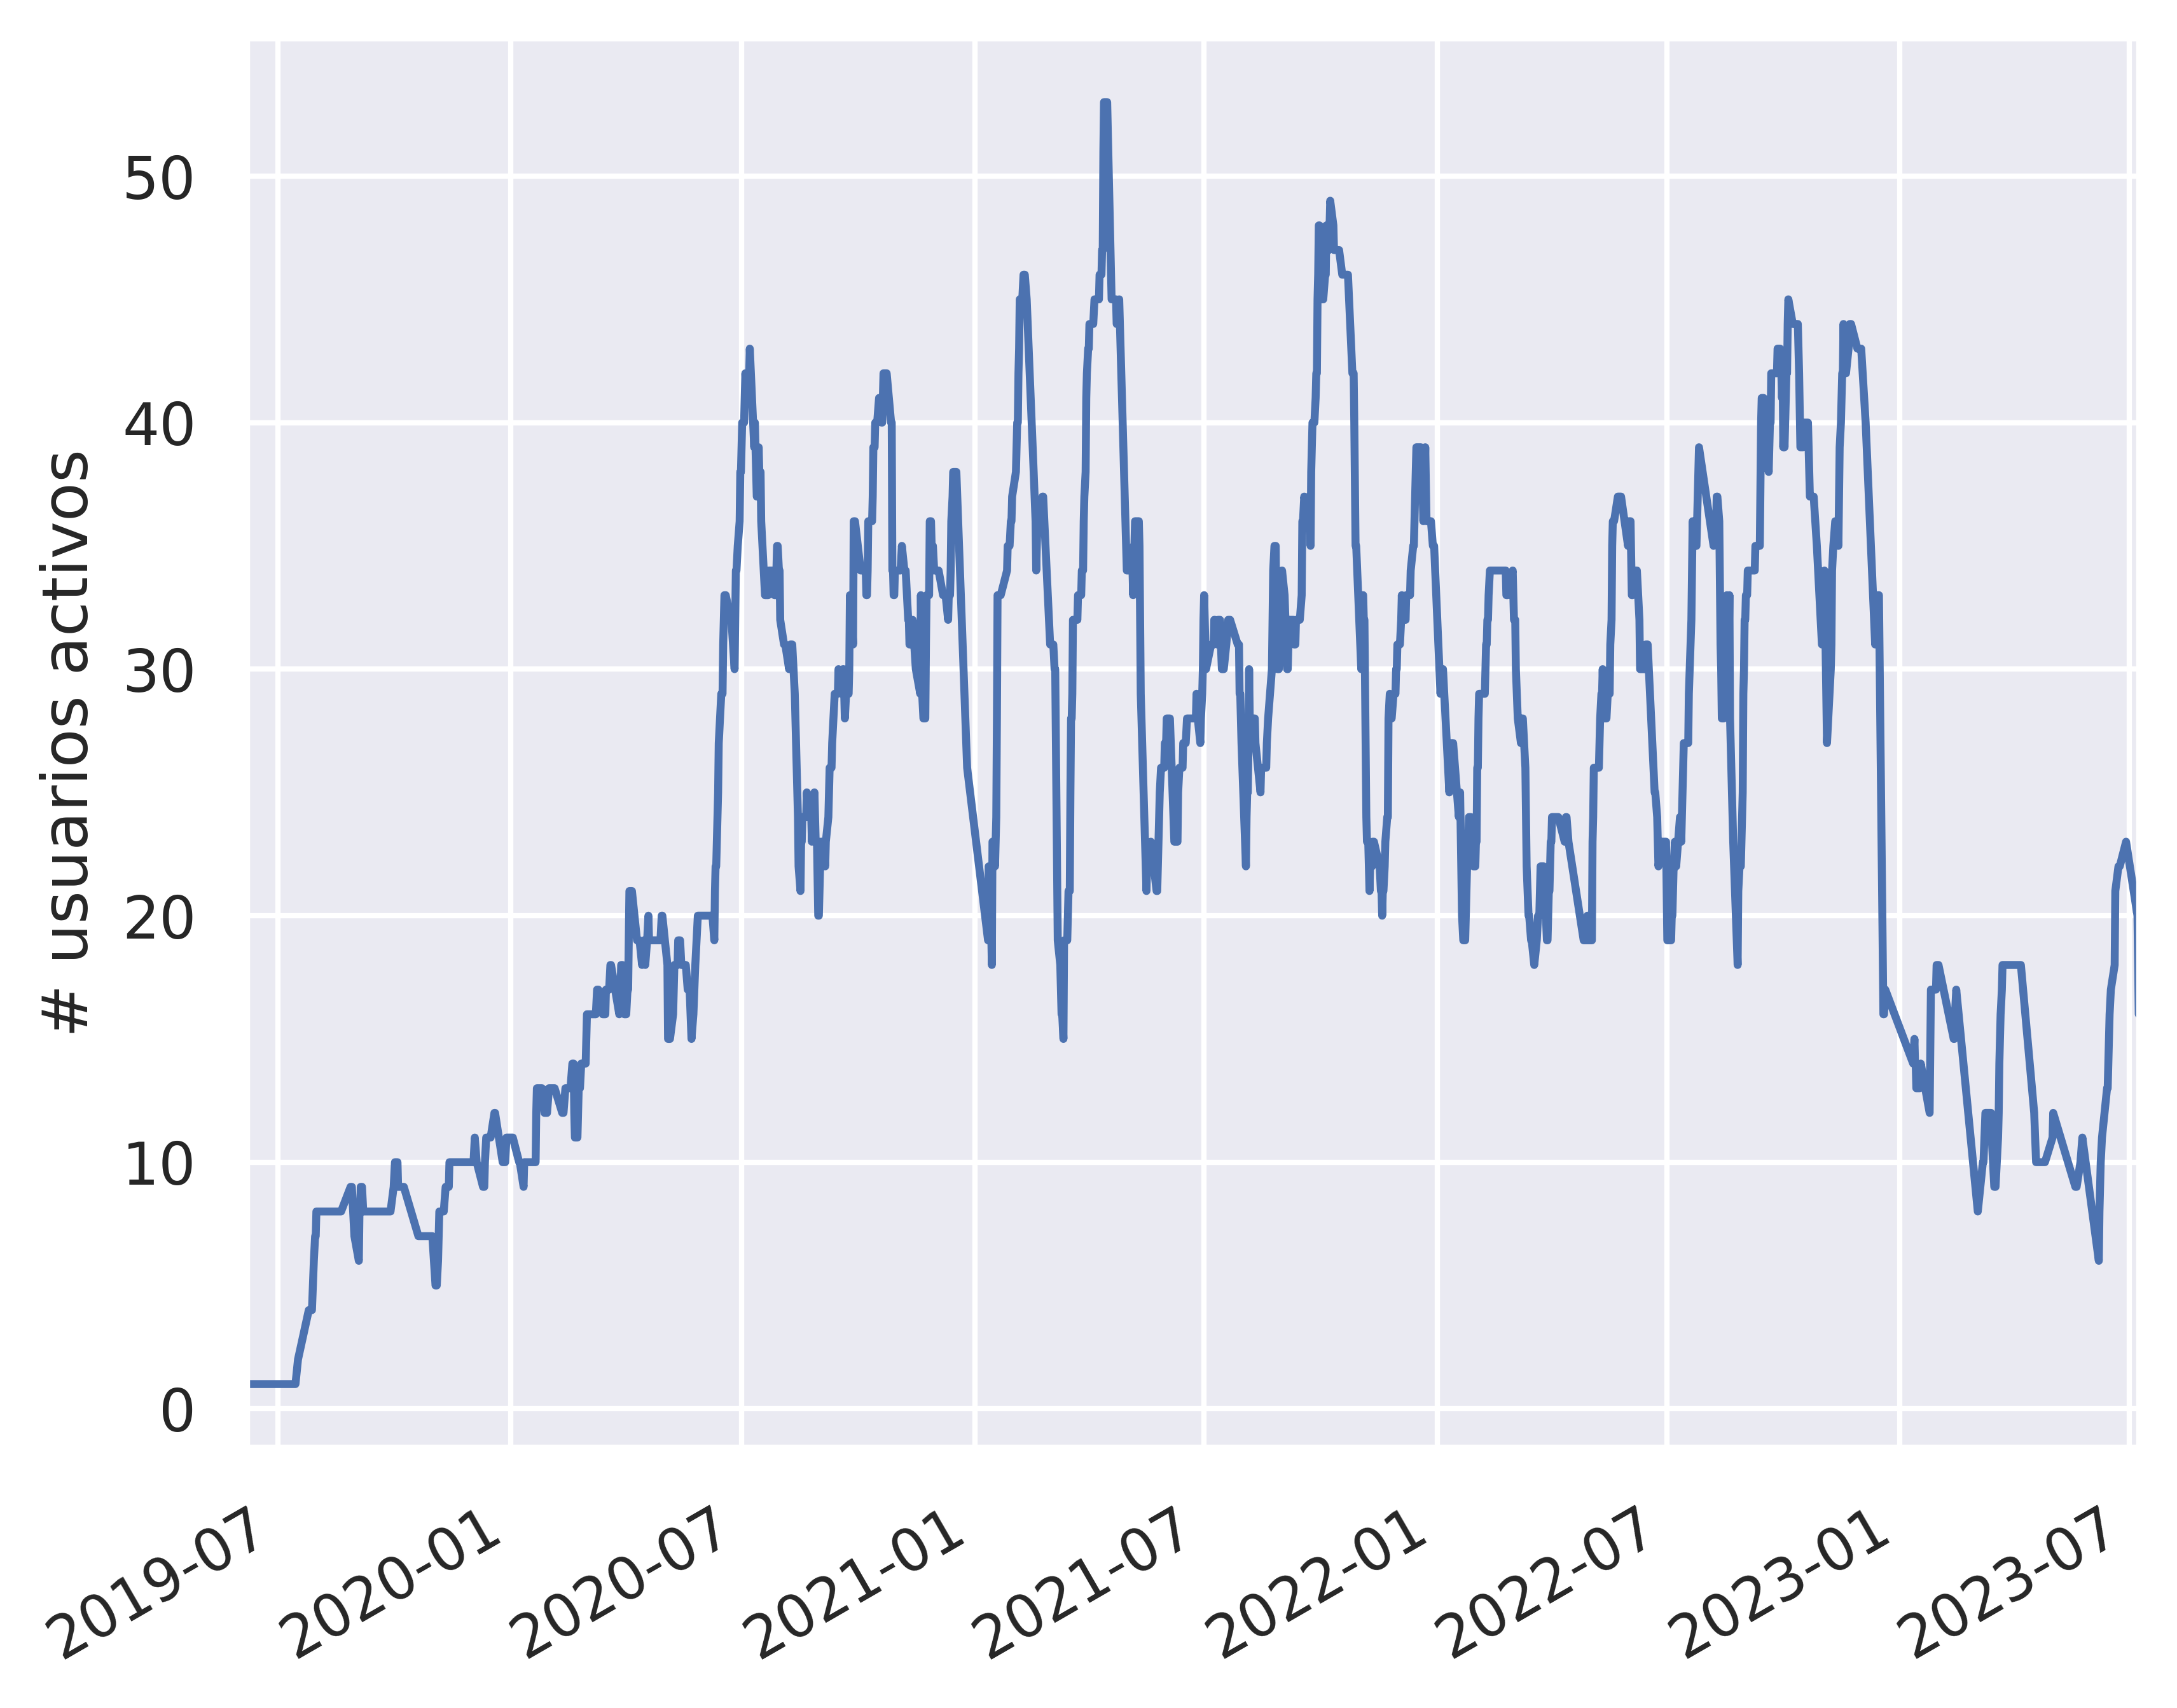

In [11]:
# import numba
from tqdm.autonotebook import tqdm
import rolling
import datetime as dt

tqdm.pandas(total=len(dfv))

# WINDOW_SIZE = '30D'
WINDOW_SIZE = dt.timedelta(days=30)

RESAMPLE_FREQ = '12h'

# @numba.jit(nopython=True)
# def nunique(arr):
#     return len(set(arr))

# Rolling no acepta tipos no númericos en la agregación, por lo que es necesario convertir la categoría a entero
# Por ejemplo, usando el código que le asigna Pandas
# dfv['ucode'] = dfv['voter'].cat.codes
#_cnt = dfv.set_index('date').sort_index().rolling(WINDOW_SIZE)['ucode'].progress_apply(nunique, raw=True).rename('cnt')

# Al final resulta que lo mejor era ir a por la solución O(1)
_voters = dfv.set_index('date').sort_index()['voter'] # .cat.codes
r = tqdm(
    rolling.arithmetic.Nunique(_voters.items(), WINDOW_SIZE, window_type='indexed'),
    total=len(dfv),
)
_cnt = pd.Series(r, index=_voters.index)
# Need to resample or there would be too many points
_cnt = _cnt.resample(RESAMPLE_FREQ).max()

print(dfv['date'].min(), dfv['date'].max())
ax = sns.lineplot(_cnt)
plt.xticks(rotation=30, ha='right')
plt.xlabel('')
plt.ylabel('# usuarios activos')
plt.xlim(dfv['date'].min(), dfv['date'].max())
nbutils.download_matplotlib(ax.figure, f'04c_rolling_voters_{WINDOW_SIZE}_{ORG_NAME}.png')

## Cuando se unen los usuarios

Es decir, cuando votan por primera vez

Cannot show ipywidgets in text

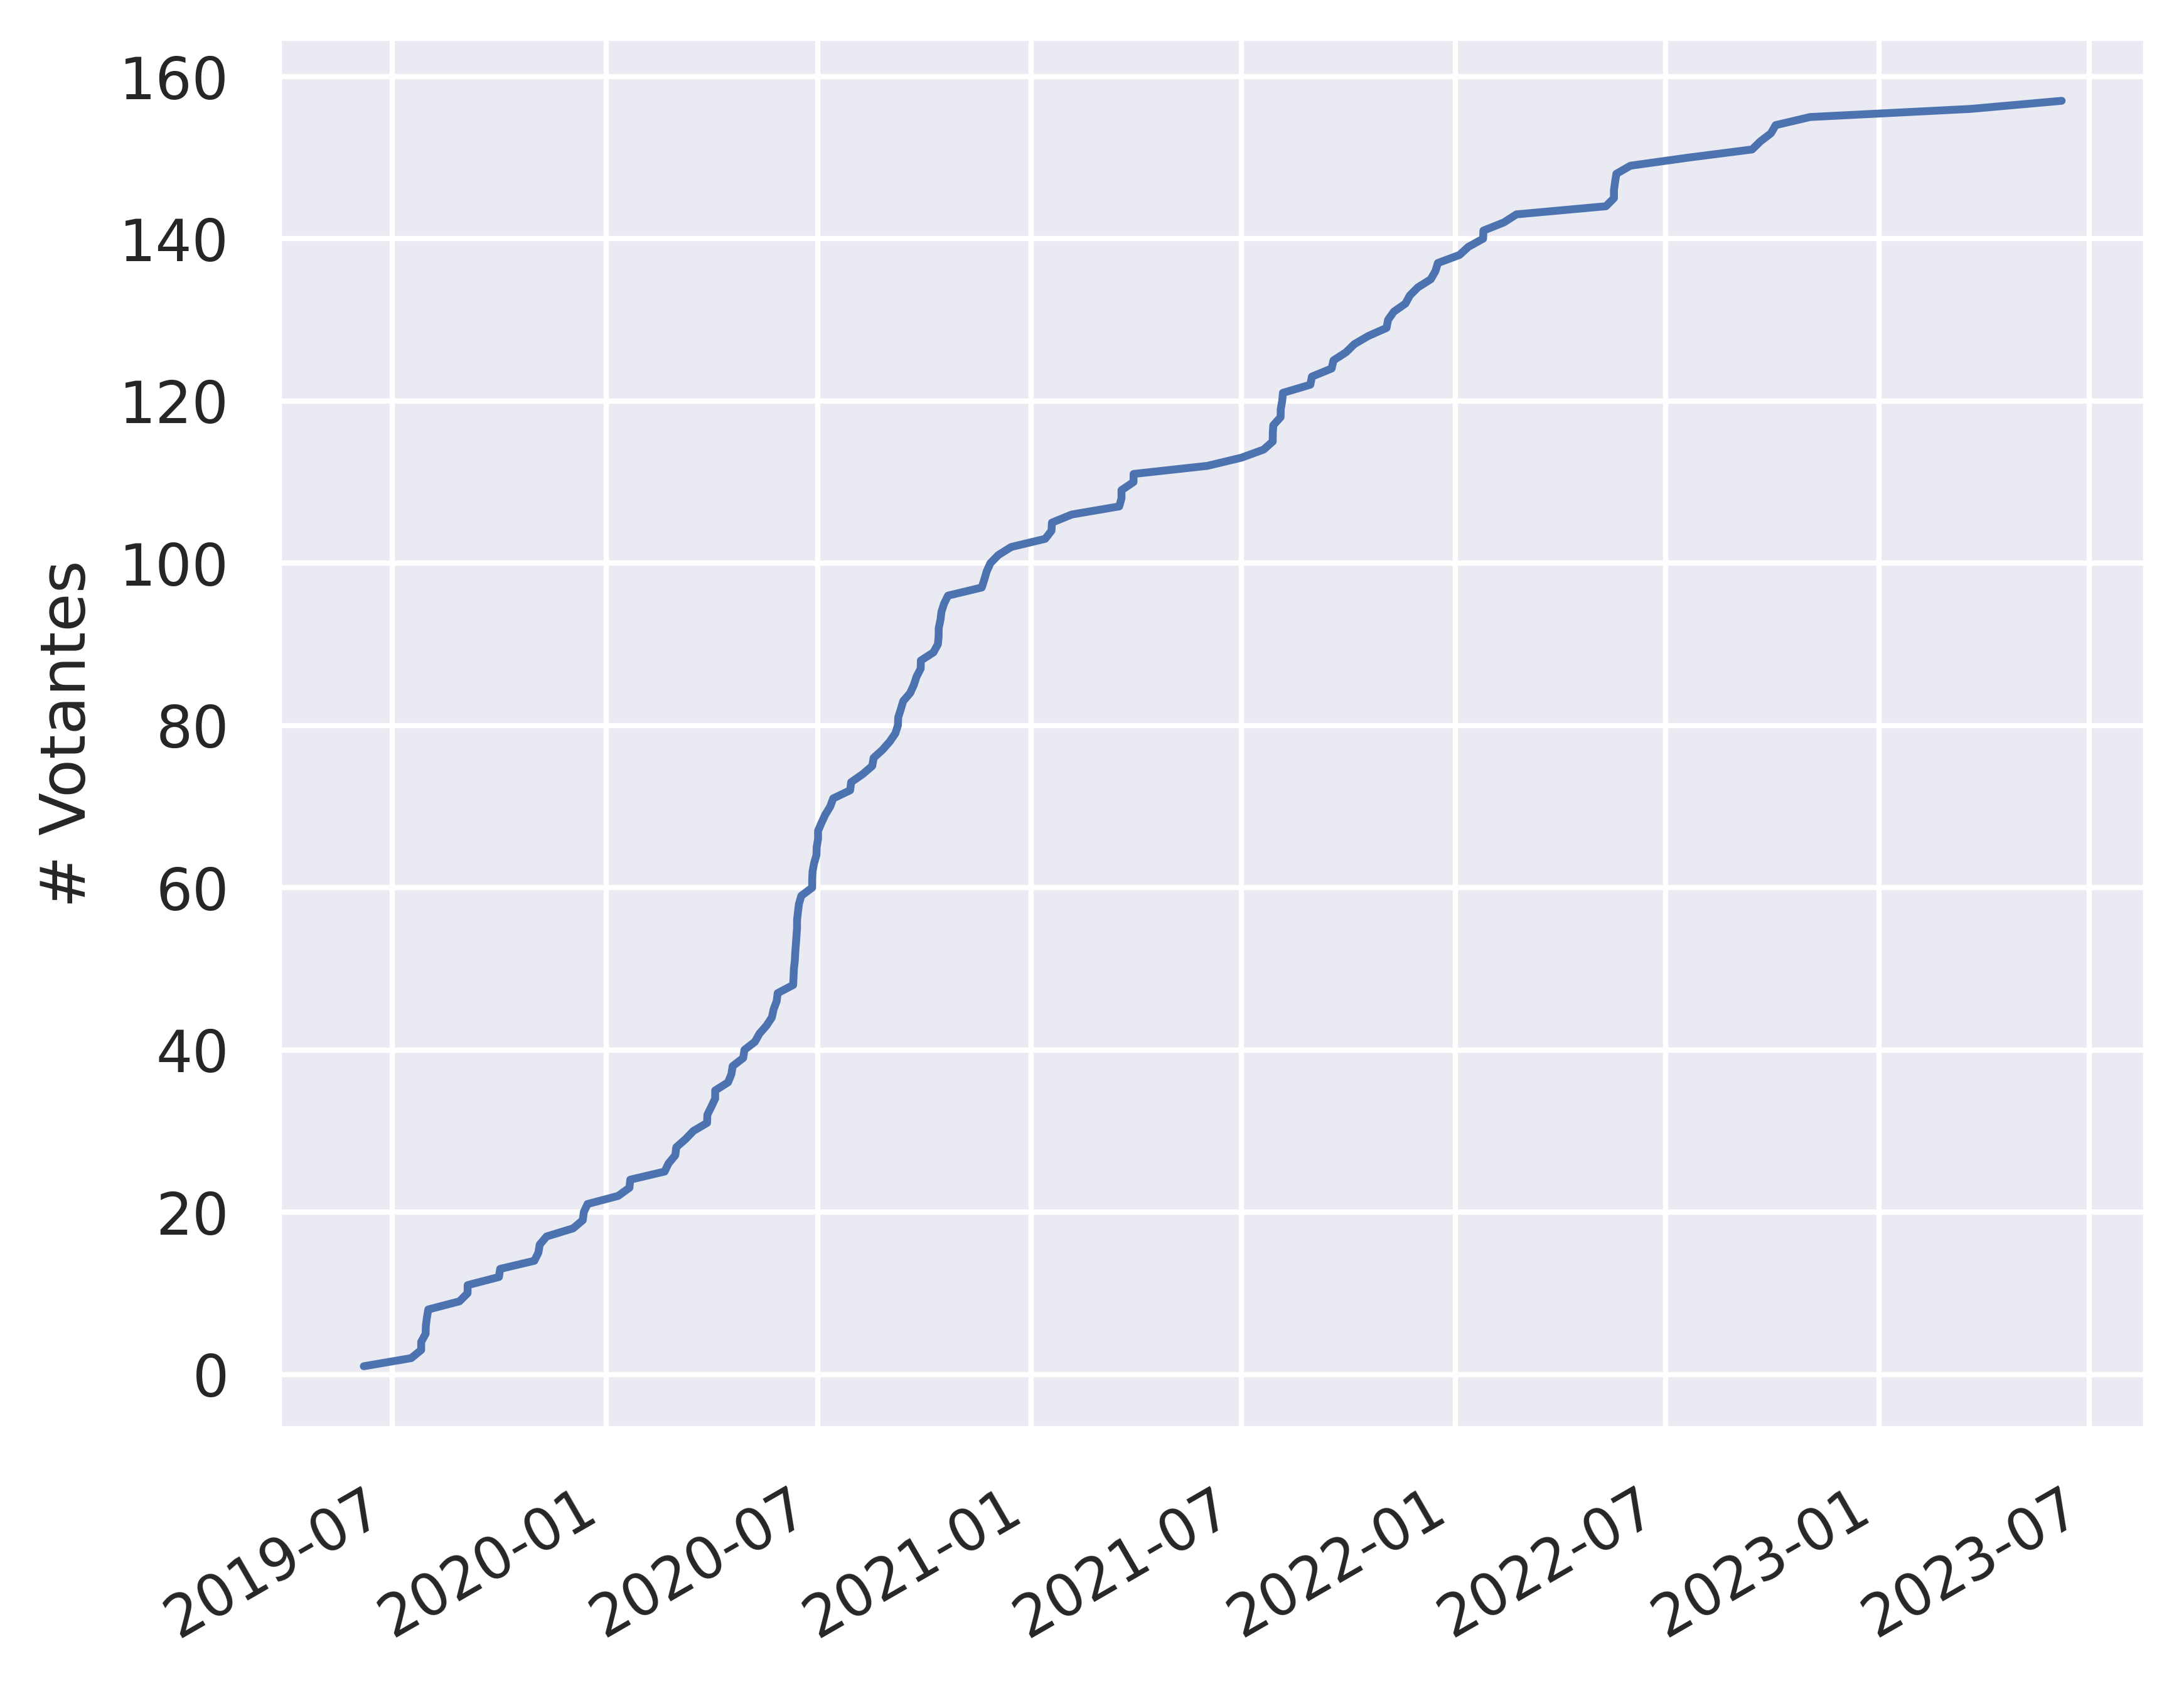

In [12]:
_toplot = dfv.groupby('voter')['date'].min()
_toplot = _toplot.sort_values().to_frame()
_toplot['cnt'] = 1
_toplot['cumcnt'] = _toplot['cnt'].cumsum()
ax = sns.lineplot(_toplot, x='date', y='cumcnt')
plt.xticks(rotation=30, ha='right')
plt.xlabel('')
plt.ylabel('# Votantes')

nbutils.download_matplotlib(ax.figure, f'04_hybrid_cumcnt_users_{ORG_NAME}.pdf')

## Cuando se crean las propuestas

Cannot show ipywidgets in text

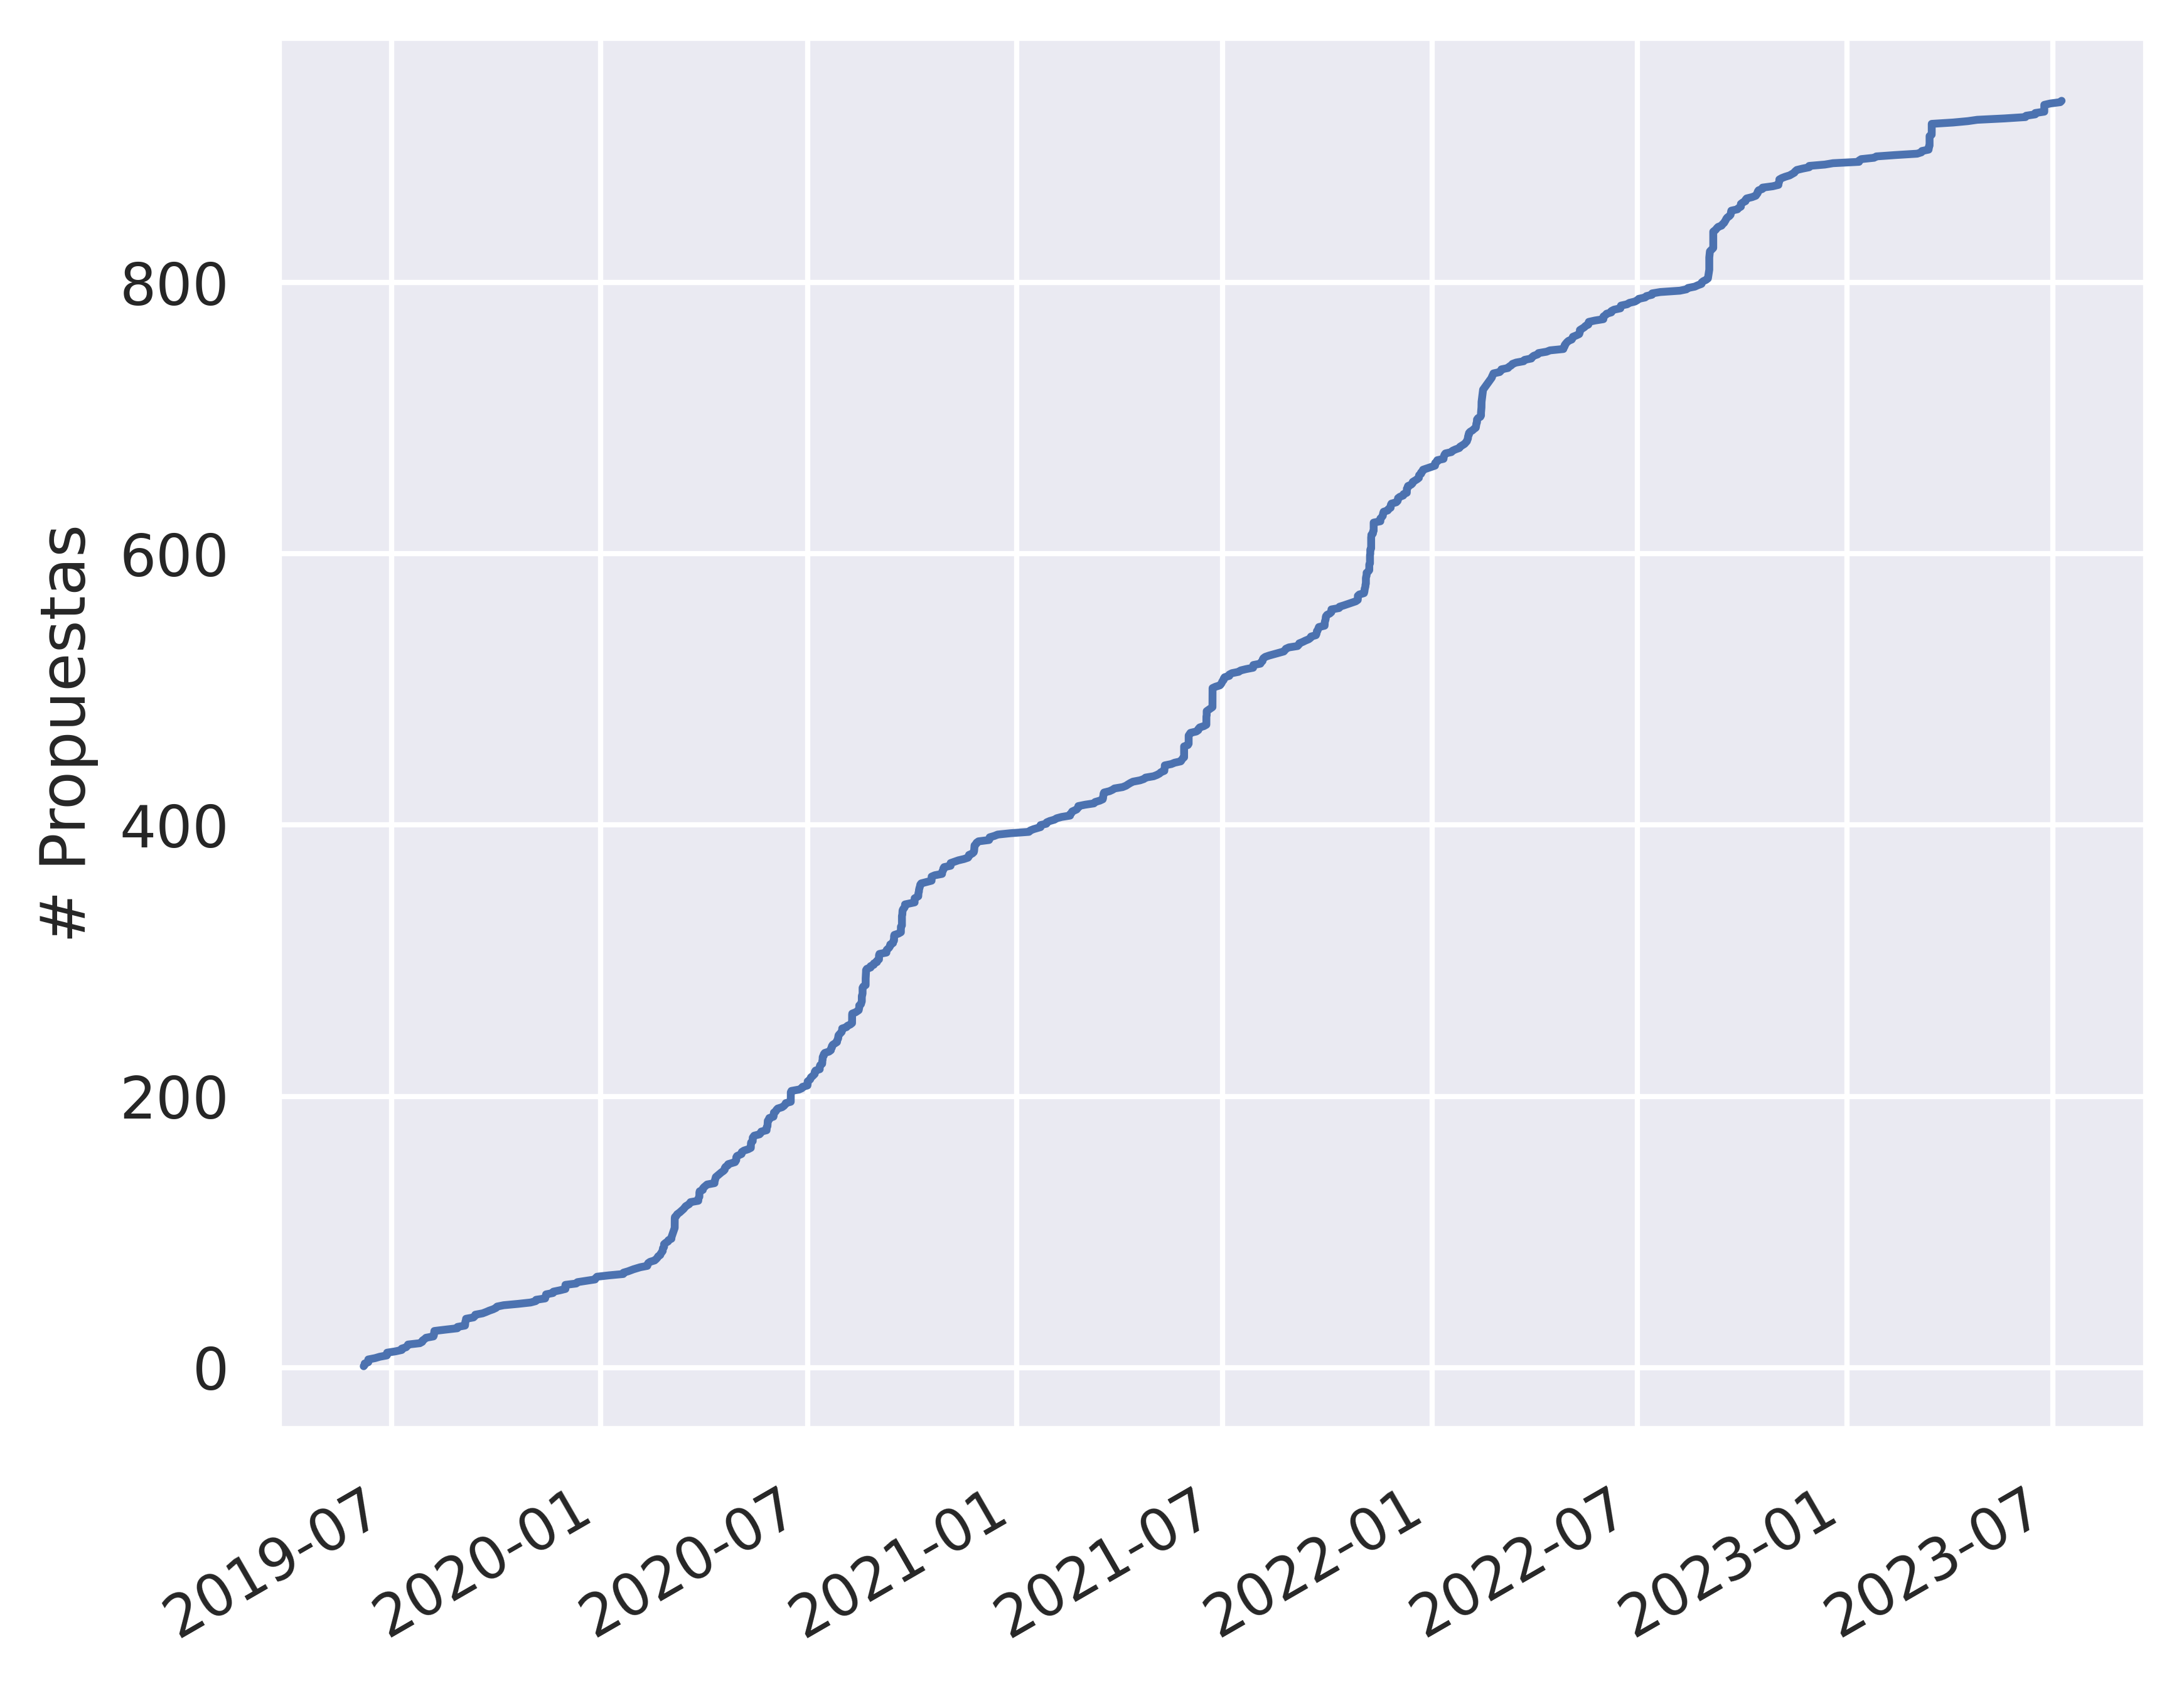

In [13]:
_toplot = dfv.groupby('proposal')['date'].min()
_toplot = _toplot.sort_values().to_frame()
_toplot['cnt'] = 1
_toplot['cumcnt'] = _toplot['cnt'].cumsum()
ax = sns.lineplot(_toplot, x='date', y='cumcnt')
plt.xticks(rotation=30, ha='right')
plt.xlabel('')
plt.ylabel('# Propuestas')

nbutils.download_matplotlib(ax.figure, f'04c_cumcnt_users_{ORG_NAME}.pdf')

Cannot show ipywidgets in text

<Figure size 3840x2880 with 0 Axes>

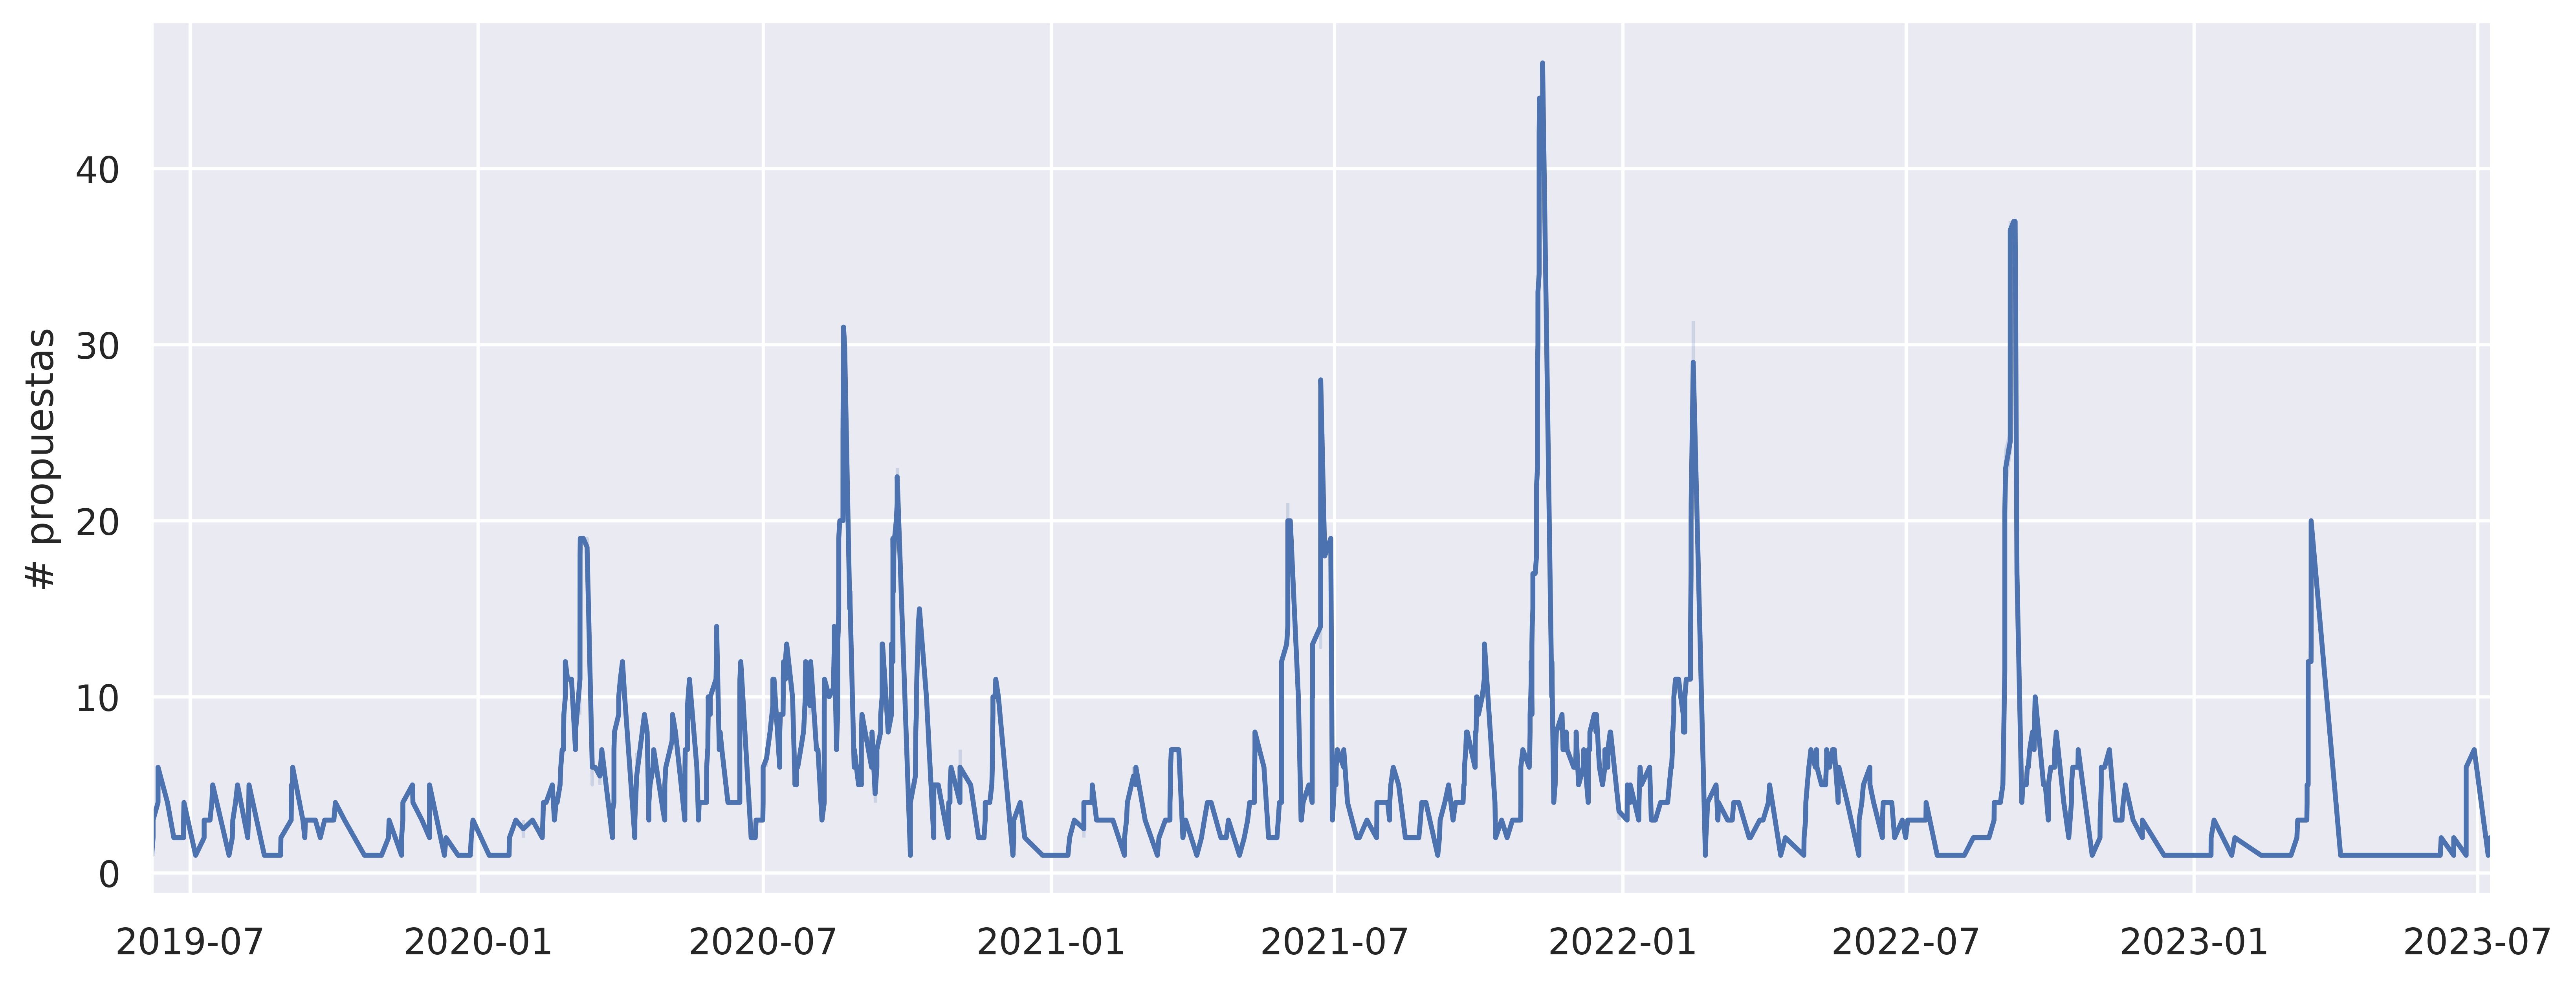

In [14]:
WINDOW_SIZE = '7D'

_toplot = dfv.groupby('proposal')['date'].min().sort_values()
_toplot = _toplot.to_frame()
_toplot['cnt'] = 1
_toplot = _toplot.rolling(window=WINDOW_SIZE, on='date').count()

# Double the width of the figure
fs = plt.gcf().get_size_inches()
plt.figure(figsize=(fs[0]*2, fs[1]))
# _toplot.set_index('date')['cnt'].plot()
ax = sns.lineplot(_toplot.set_index('date')['cnt'])

plt.xlabel('')
plt.ylabel('# propuestas')
plt.xlim(
    _toplot['date'].min(),
    _toplot['date'].max(),
)

sns.despine()
nbutils.download_matplotlib(ax.figure, f'04c_rolling_proposals_{WINDOW_SIZE}_{ORG_NAME}.pdf')

## Dia de la semana en que se votan las propuestas

> incluso, se podría hacer un heatmap X cuando se lanzan Y cuando se votan y Z (color) la frecuencia
> -- Javi

Vamos, que en esta celda vamos a intentar hacer un HEATMAP donde:
- X: dia de la semana de creación de la propuesta
- Y: dia de la semana de votación
- Z: número de votos

In [15]:
_toplot.to_numpy()

array([[Timestamp('2019-06-06 09:49:38'), 1.0],
       [Timestamp('2019-06-07 07:03:42'), 2.0],
       [Timestamp('2019-06-07 07:04:48'), 3.0],
       ...,
       [Timestamp('2023-06-28 20:30:25'), 7.0],
       [Timestamp('2023-07-07 17:52:59'), 1.0],
       [Timestamp('2023-07-08 22:08:35'), 2.0]], dtype=object)

Text(277.49999999999994, 0.5, 'Día votación')

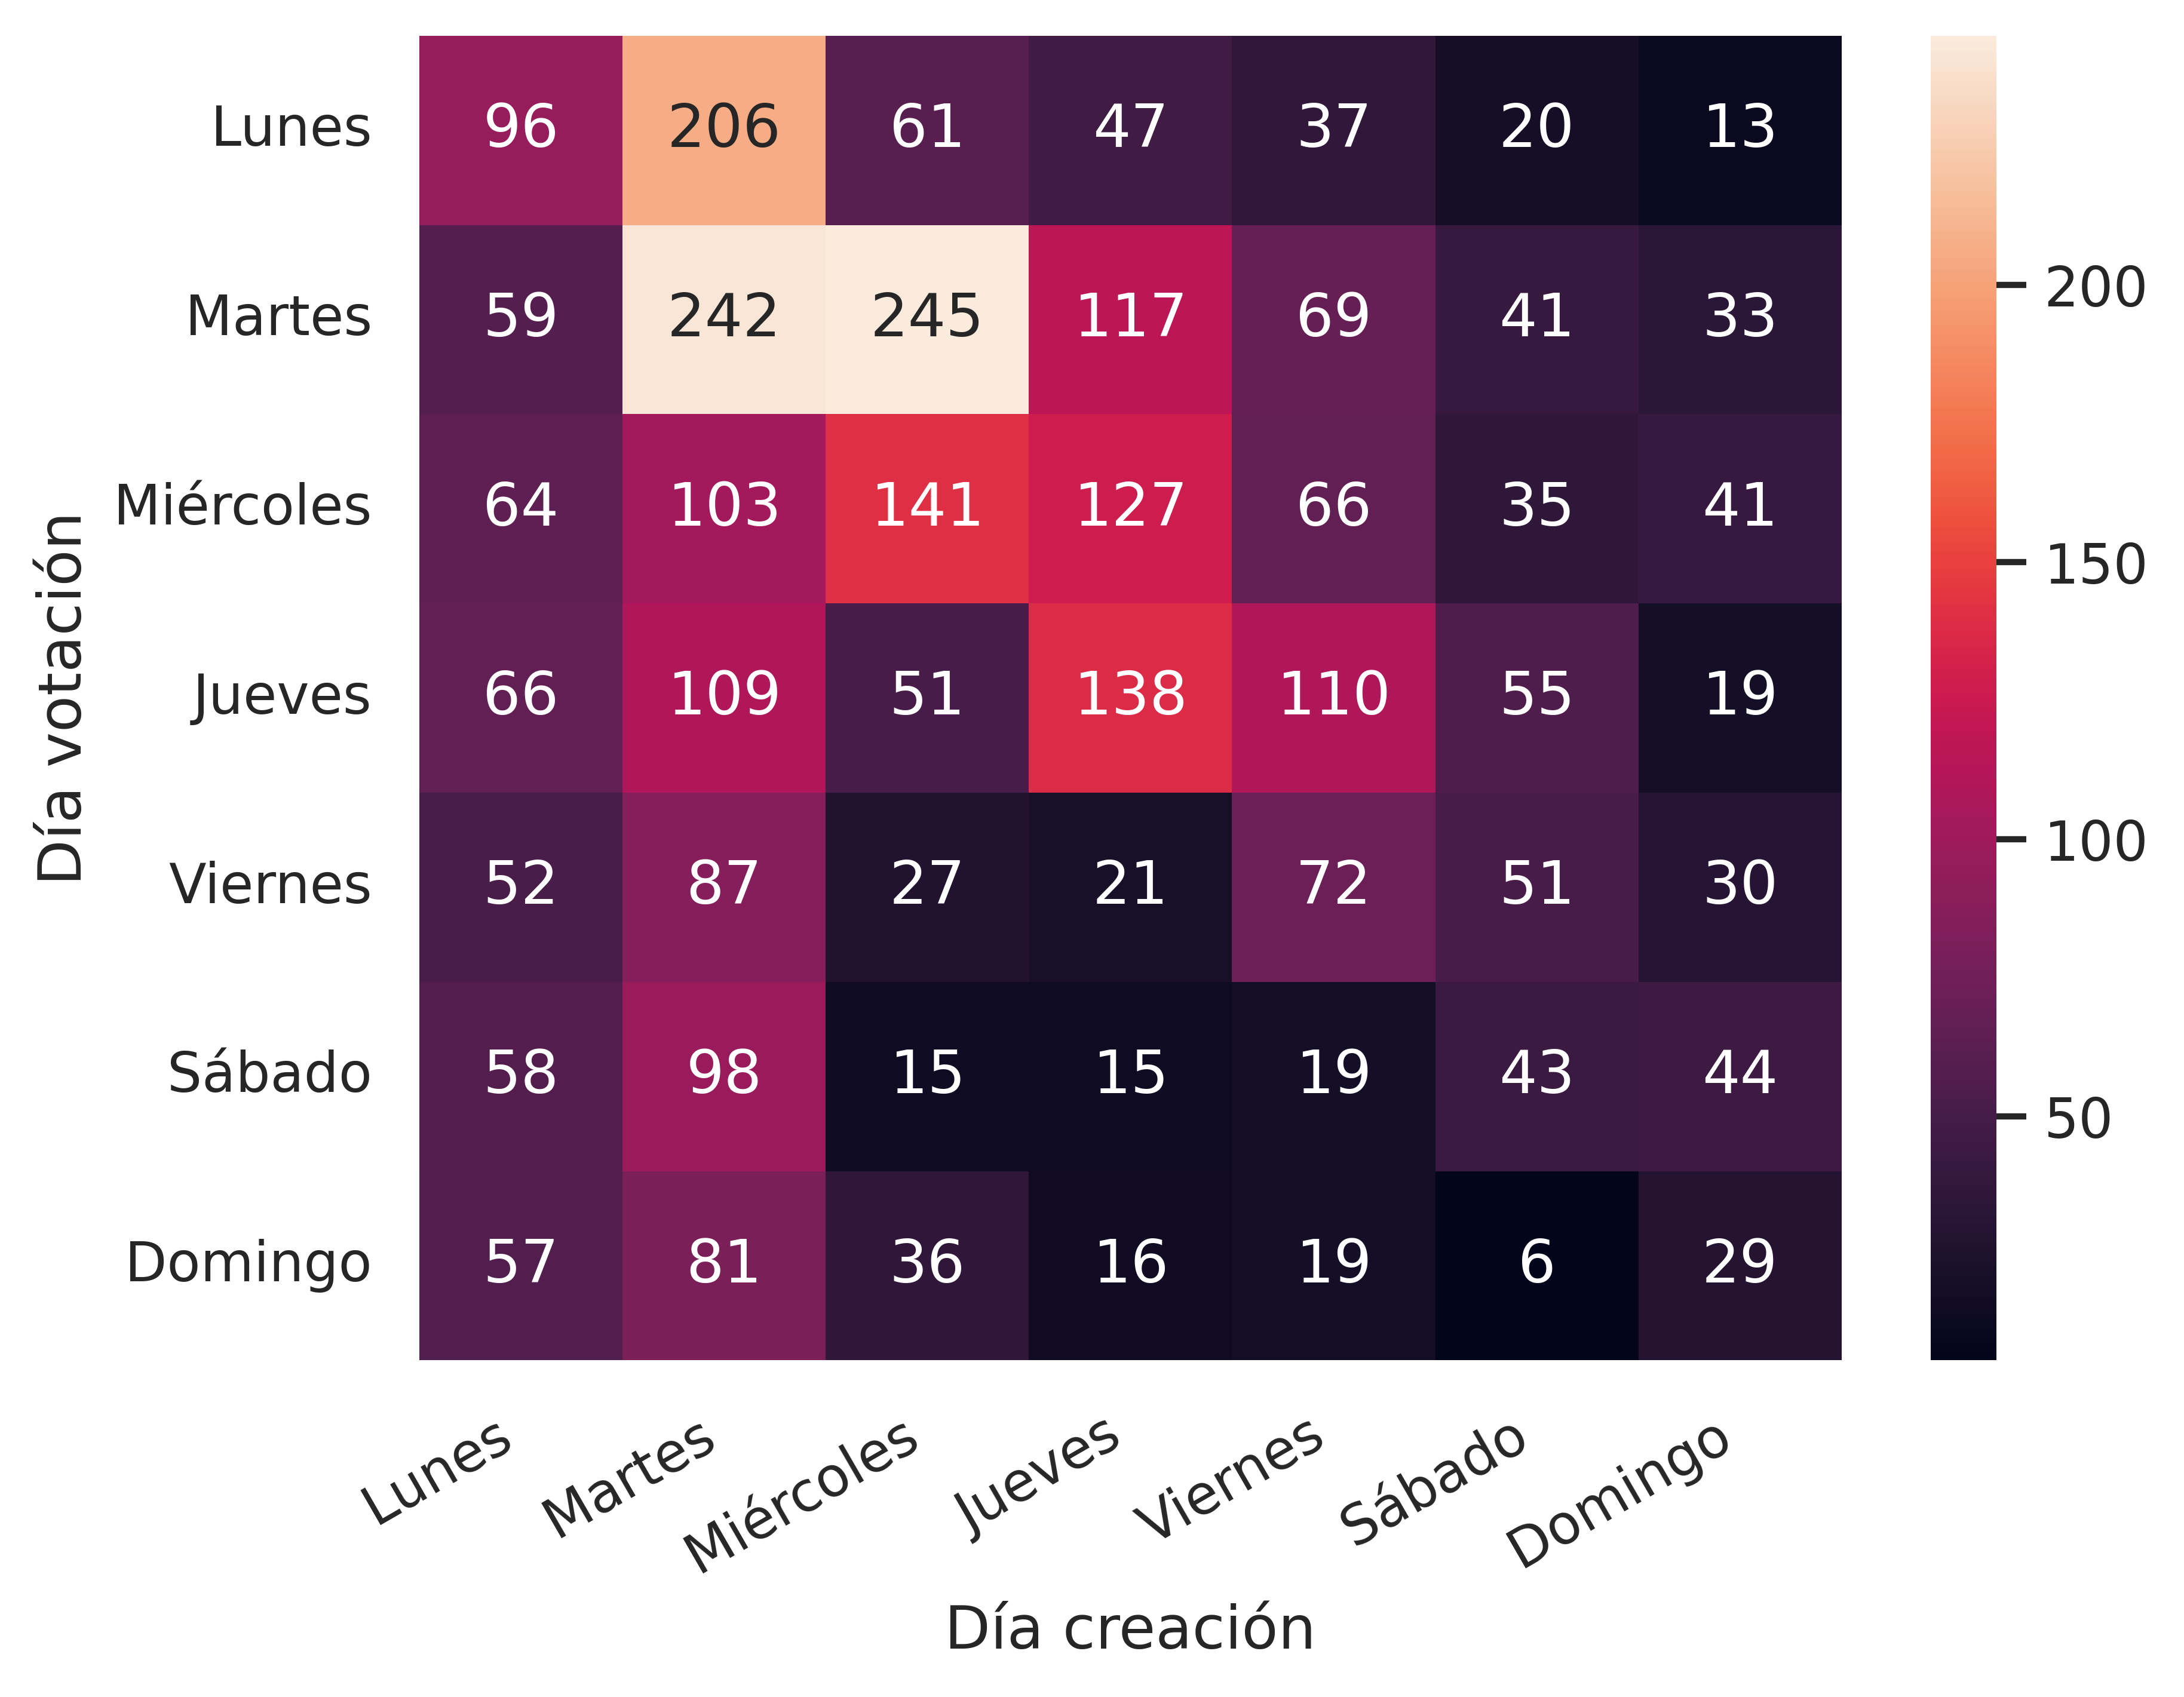

In [16]:
# In pandas, 0 = Monday
# https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.dayofweek.html

spanish_dow = {
    0: 'Lunes',
    1: 'Martes',
    2: 'Miércoles',
    3: 'Jueves',
    4: 'Viernes', 
    5: 'Sábado',
    6: 'Domingo',
}

_dfvp = dfv.merge(dfp['date'].rename('proposal_date'), left_on='proposal', right_index=True)
_dfvp['date_dow'] = _dfvp['date'].dt.day_of_week
_dfvp['proposal_date_dow'] = _dfvp['proposal_date'].dt.dayofweek
# sns.load_dataset("glue").pivot(index="Model", columns="Task", values="Score")
_toplot = pd.crosstab(_dfvp['proposal_date_dow'], _dfvp['date_dow']).rename(index=spanish_dow, columns=spanish_dow)

sns.heatmap(_toplot, annot=True, fmt='g')
plt.xticks(rotation=30, ha='right')

plt.xlabel('Día creación')
plt.ylabel('Día votación')

Cannot show ipywidgets in text

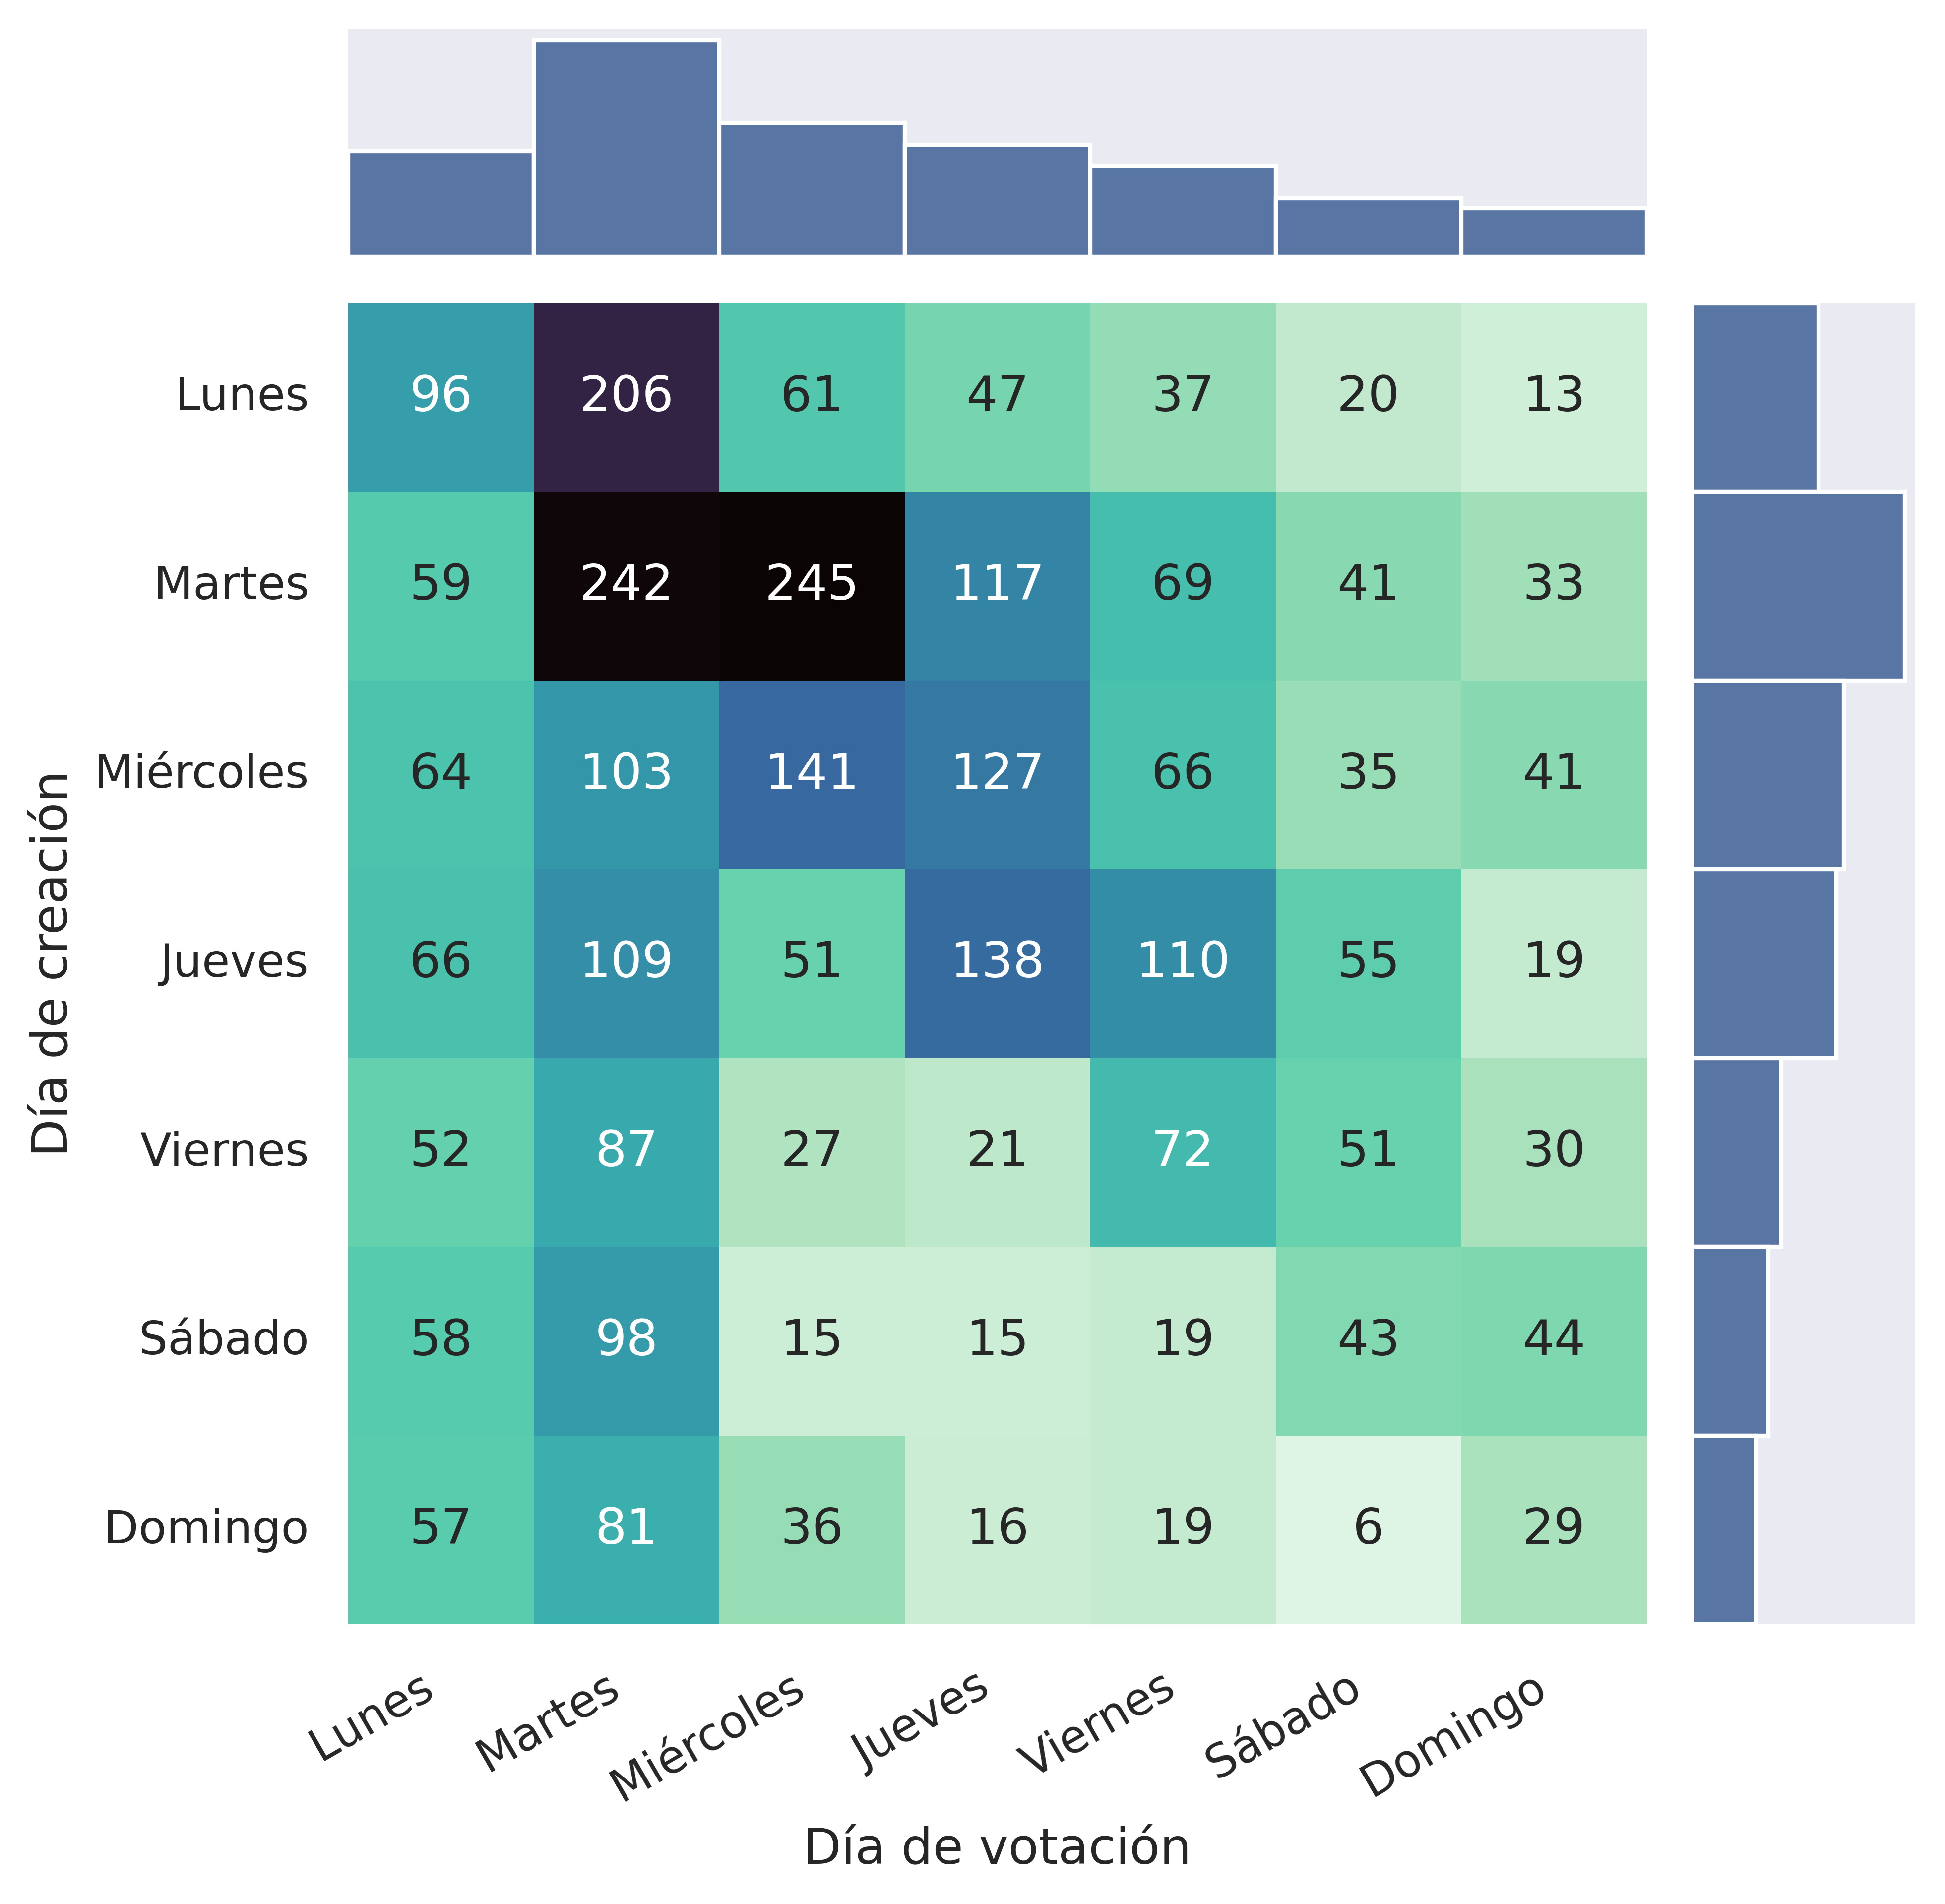

In [17]:
# _toplot = pd.crosstab(...)

grid = sns.JointGrid()

sns.heatmap(_toplot, ax=grid.ax_joint, cbar=False, annot=True, fmt='g', cmap='mako_r')
sns.barplot(_toplot.sum(), ax=grid.ax_marg_x, width=1)
sns.barplot(_toplot.sum(axis=1), ax=grid.ax_marg_y, orient='h', width=1)
_off = .5

# Fix x
_xmin, _xmax = grid.ax_joint.get_xlim()
grid.ax_joint.set_xlim(_xmin+_off, _xmax+_off)
for bar in grid.ax_marg_x.containers[0]:
    bar.set_x(bar.get_x() + _off)

# Fix y
_ymin, _ymax = grid.ax_joint.get_ylim()
grid.ax_joint.set_ylim(_ymin+_off, _ymax+_off)
for bar in grid.ax_marg_y.containers[0]:
    bar.set_y(bar.get_y() + _off)

grid.ax_joint.set_xticklabels(grid.ax_joint.get_xticklabels(), rotation=30, ha='right')
grid.ax_joint.yaxis.set_tick_params(rotation=0)

grid.ax_joint.set_xlabel('Día de votación')
grid.ax_joint.set_ylabel('Día de creación')

nbutils.download_matplotlib(grid, f'04c_heatmap_proposals_{ORG_NAME}.pdf')

<Axes: xlabel='proposal_date_dow', ylabel='count'>

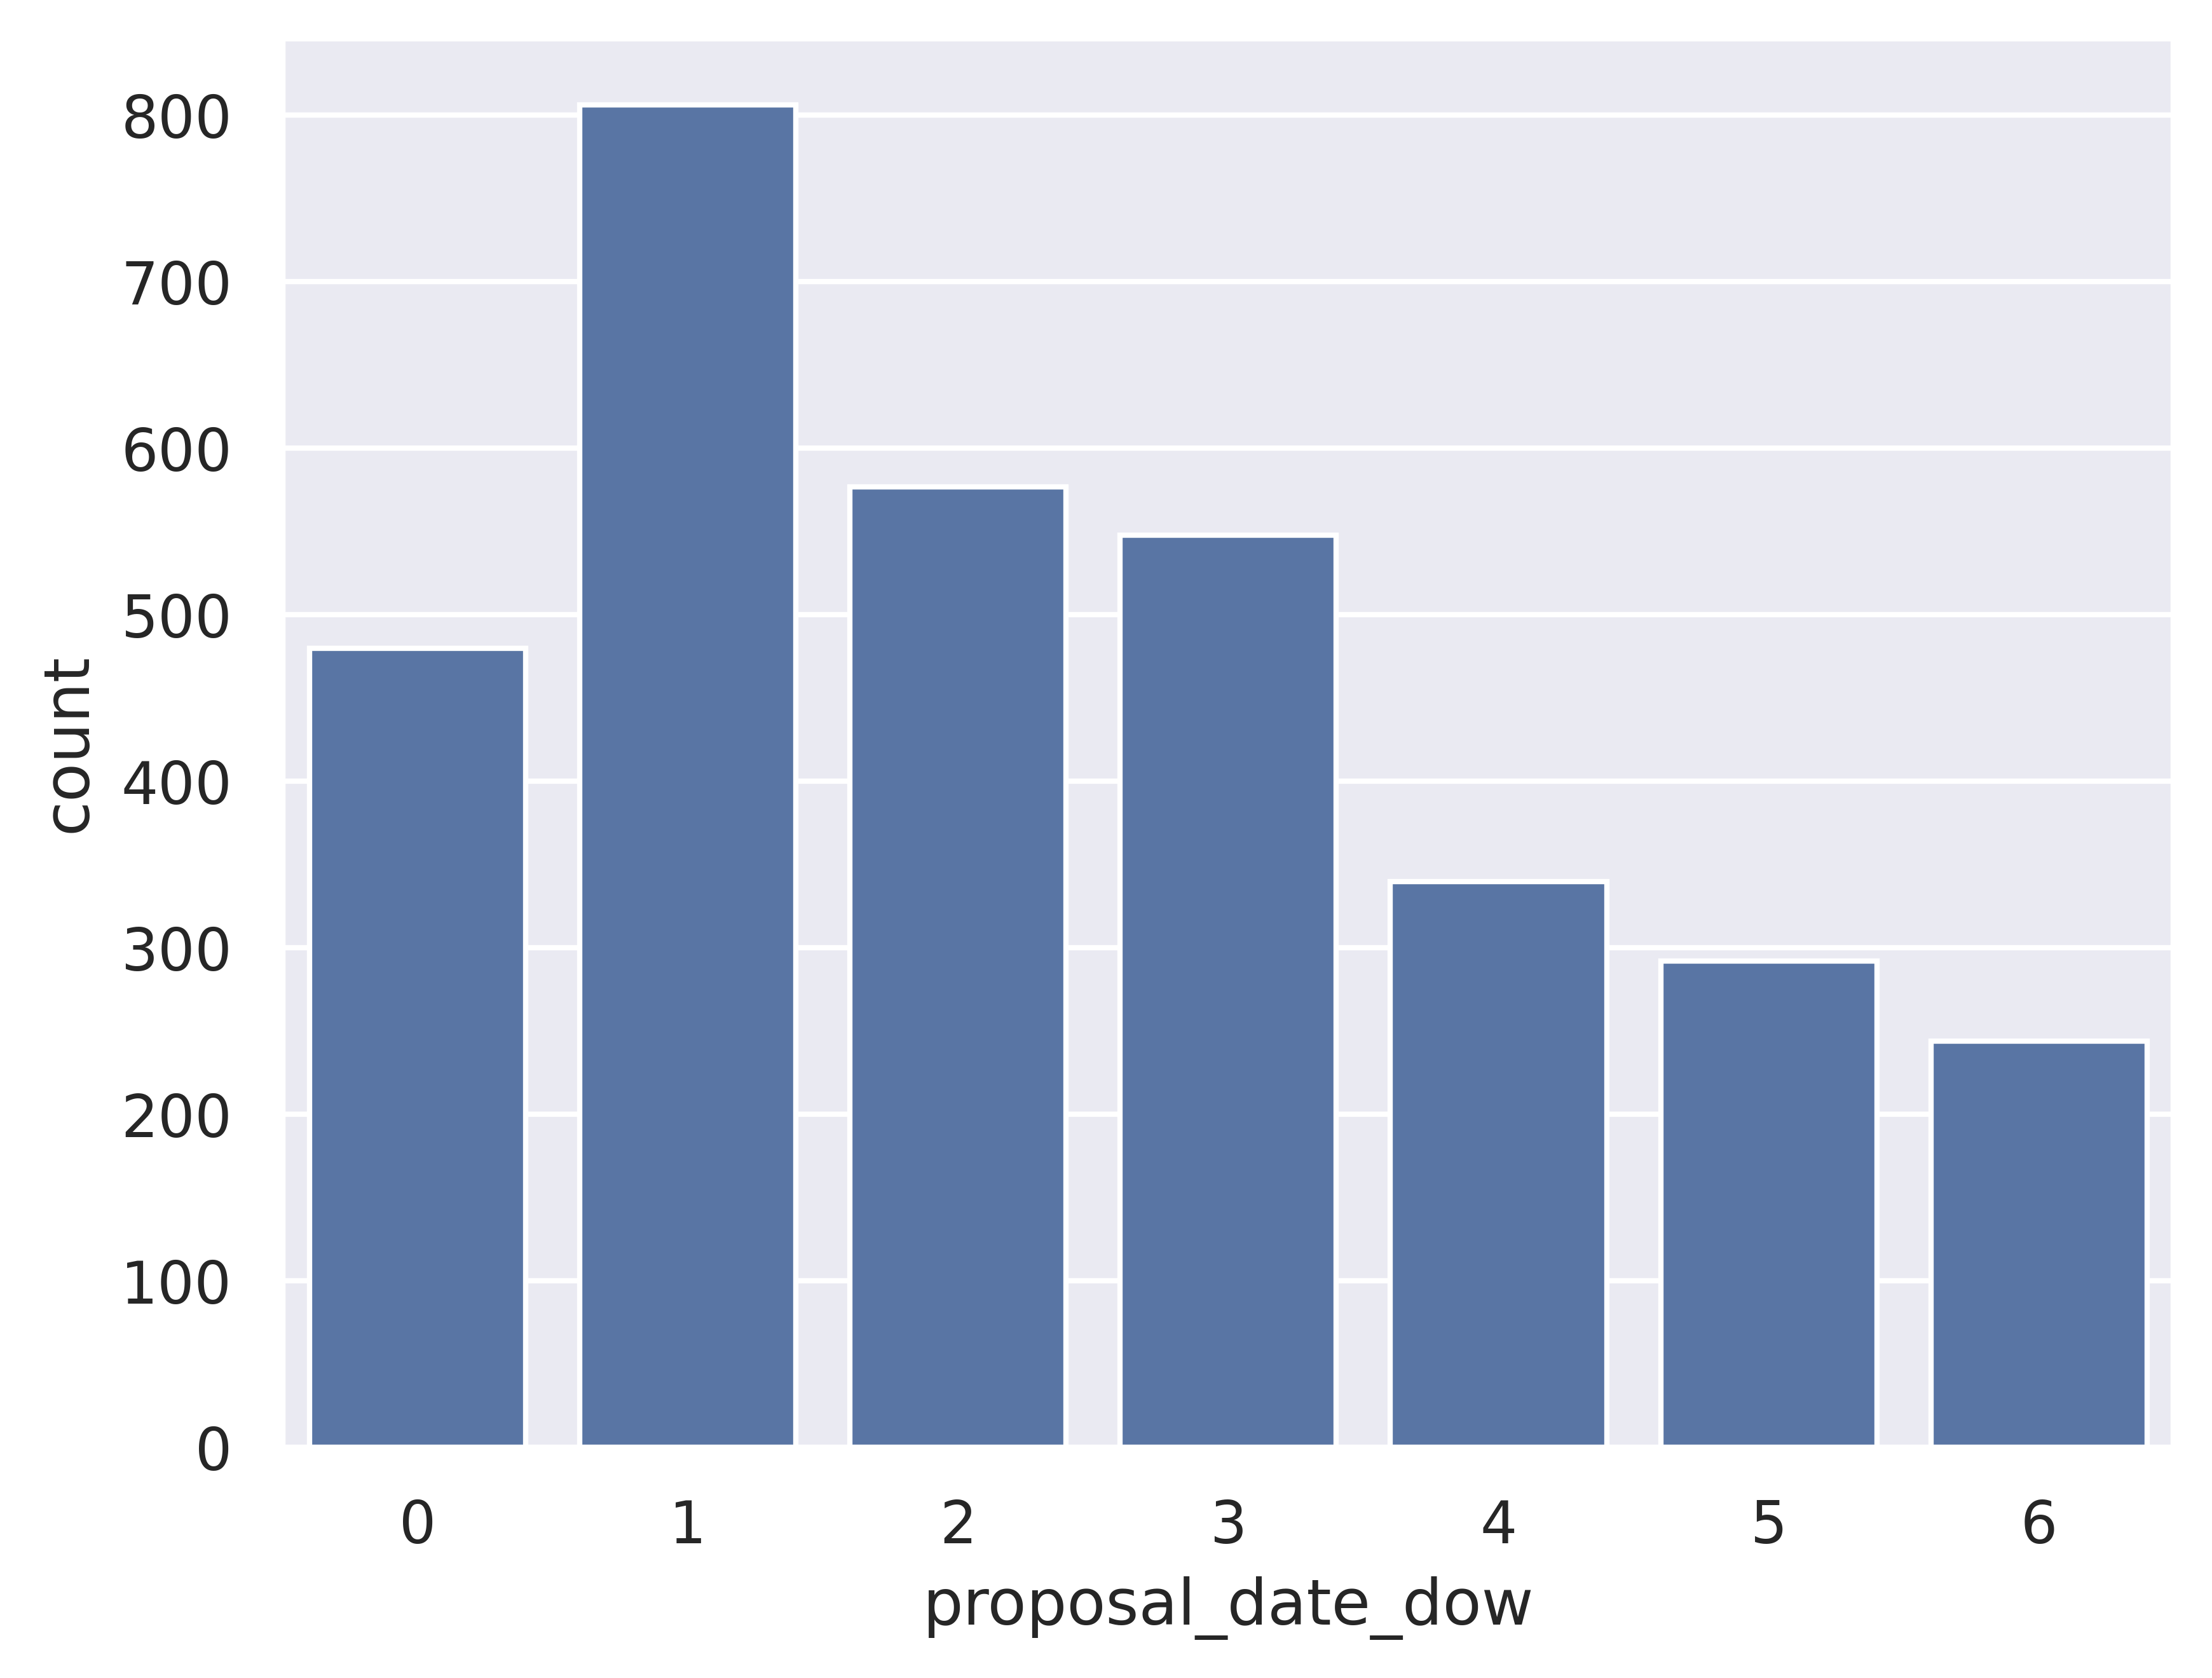

In [18]:
sns.countplot(_dfvp, x='proposal_date_dow')

<Axes: xlabel='count', ylabel='date_dow'>

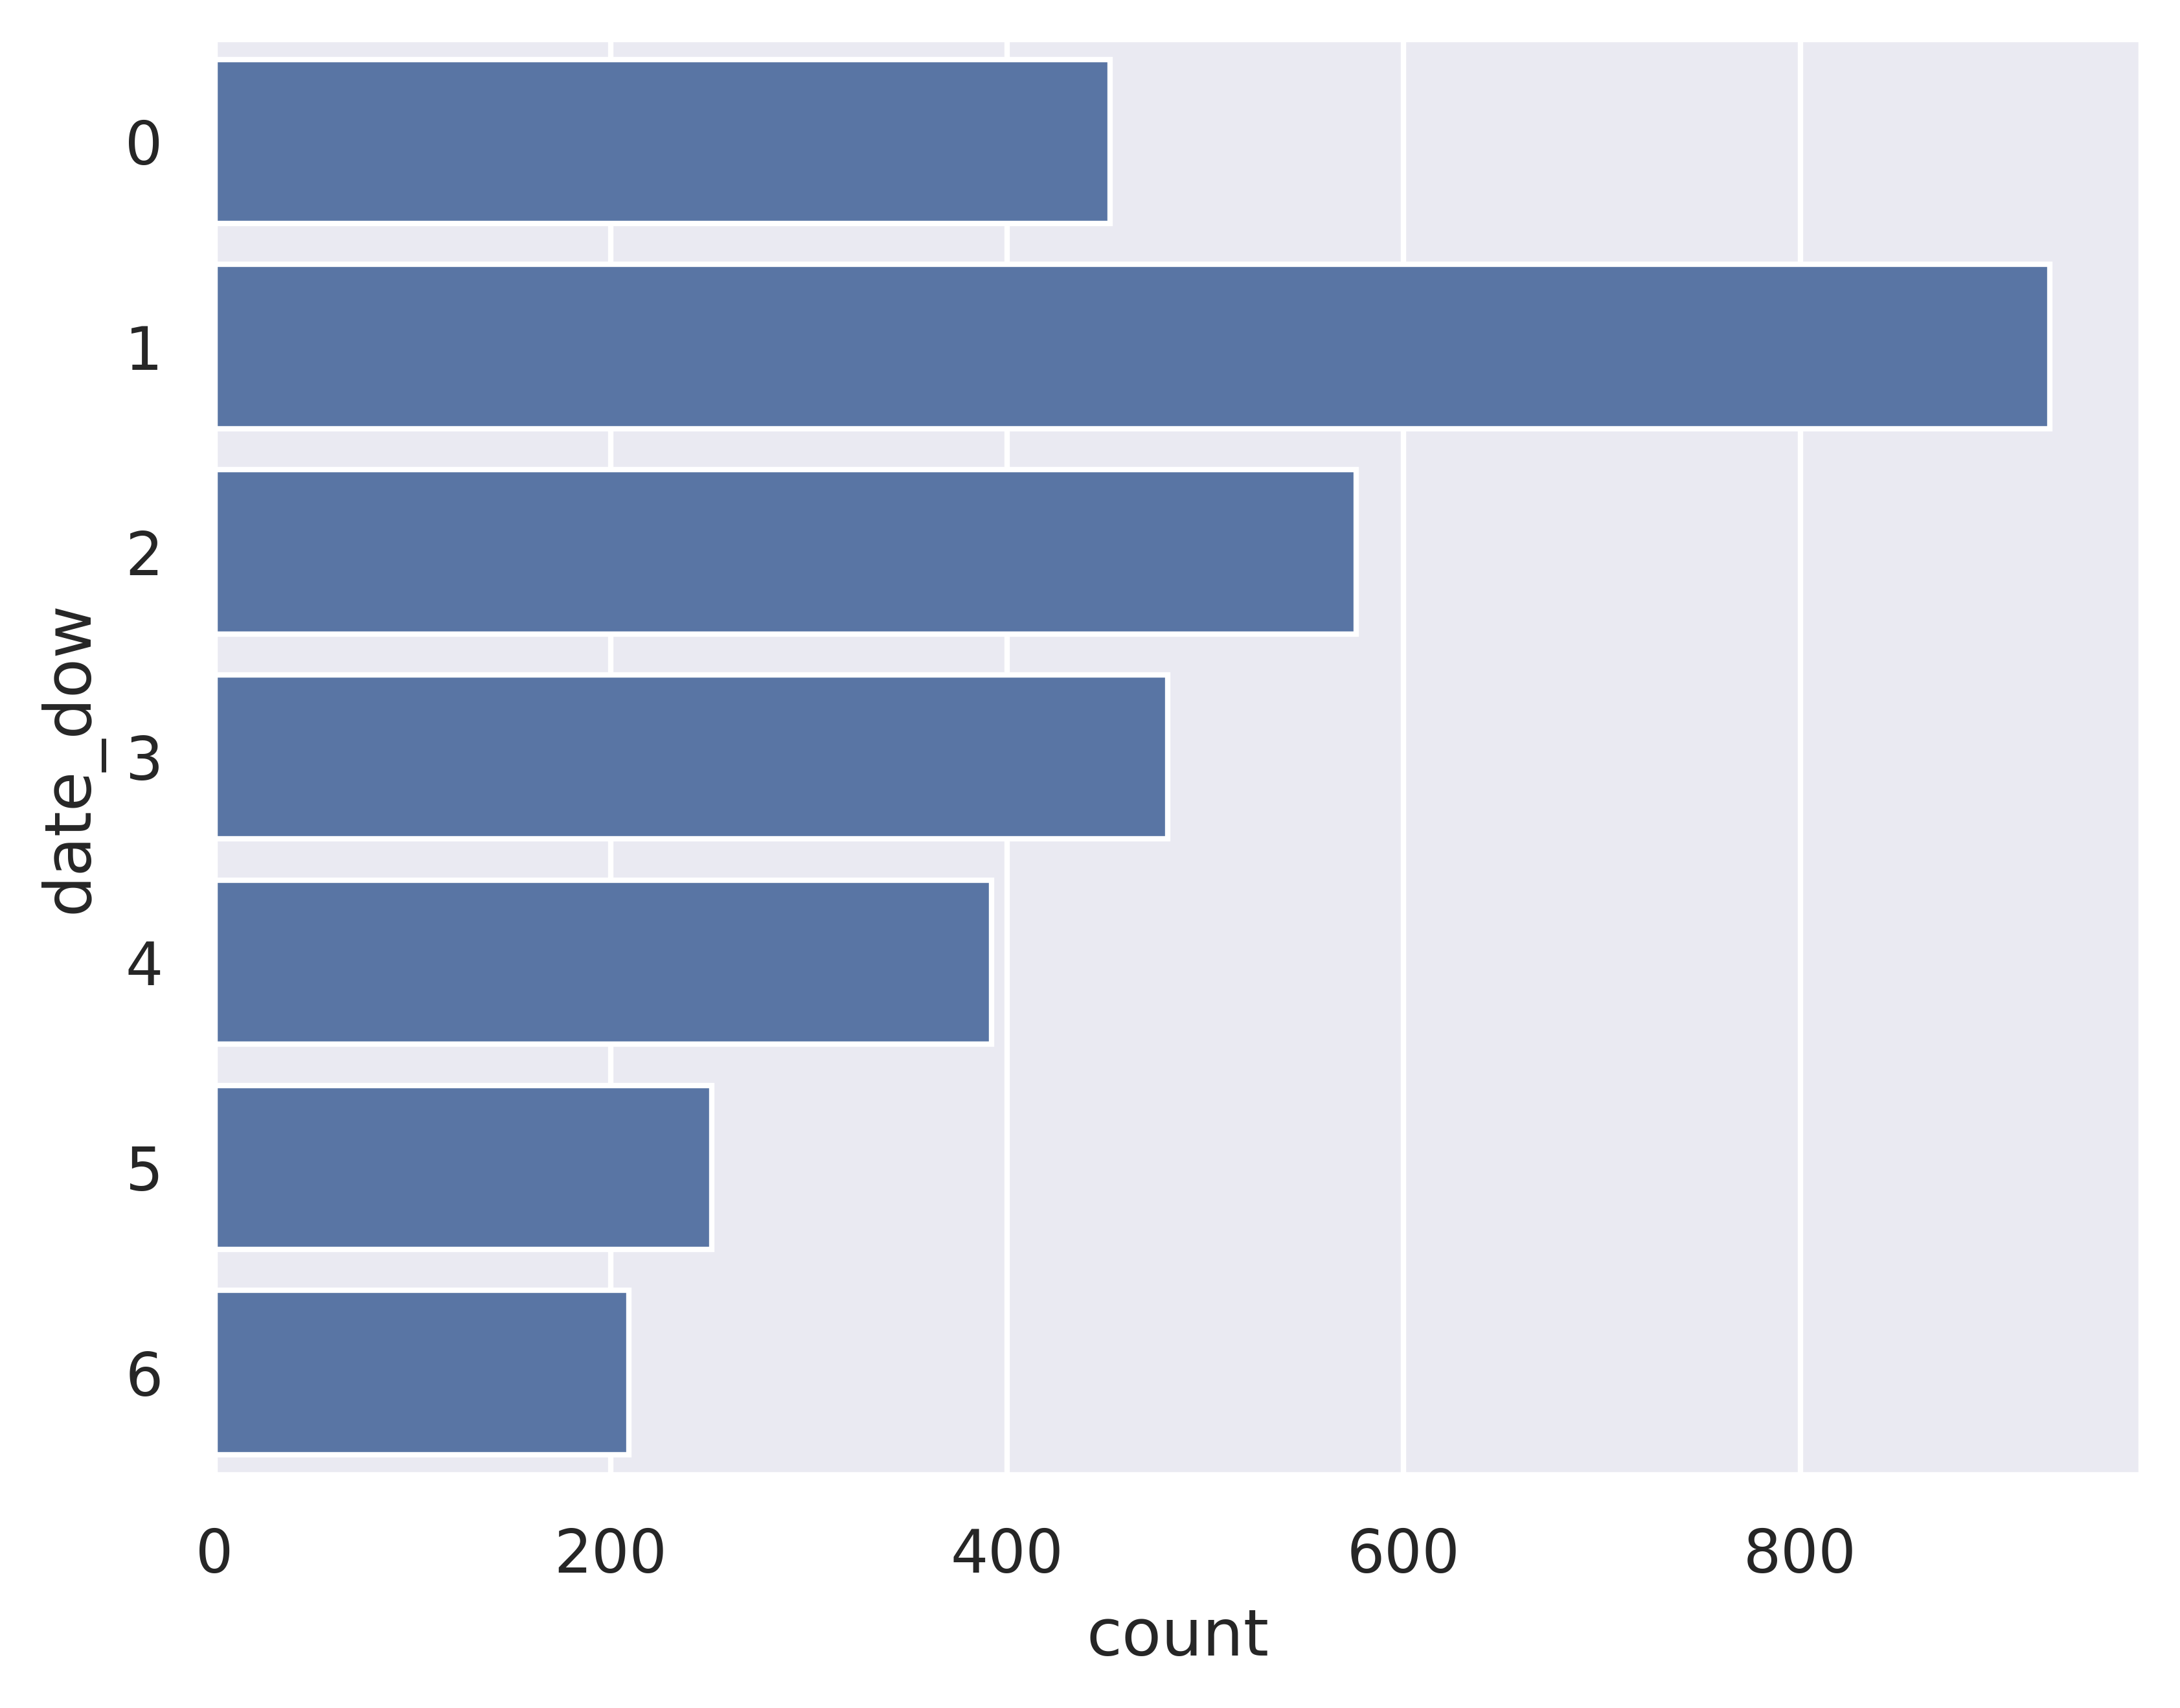

In [19]:
sns.countplot(_dfvp, y='date_dow')

## Suelen votarse las propuestas al principio o al final

In [20]:
def proposal_histogram(proposal):
    p = dfp.loc[proposal]
    _aux = dfv[dfv["proposal"] == proposal][['platform', 'name', 'date']].copy().sort_values('date')
    first_vote = p['start']
    last_vote = p['end']
    print(p['start'], p['end'], p['end'] - p['start'])
    _aux['date_rel'] = (_aux['date'] - p['start']) / (p['end'] - p['start'])
    # sns.ecdfplot(_aux['date_rel'])
    ax = sns.histplot(_aux['date_rel'])
    ax.set_title(f"Histograma de tiempo de los votos en la propuesta {proposal}")
    return ax

# proposal_histogram(proposal = "b86aa059-3d31-5d41-a472-70962816f779")

## Ahora para TODOS los votos

Cuidado que este grafo puede estar sesgado por una sola propuesta

In [21]:
dfp

platform  \
id                                               
c3900c37-f5f8-5398-898c-99f14906b437  snapshot   
2146dd89-0761-5790-adae-286509322e5c  snapshot   
3ee15ea2-3a35-5806-8c5e-a0c50d6203f7  snapshot   
9dfe31d8-0337-5848-9809-12646c62cdd3  snapshot   
3a768f87-0c71-5736-82ab-261ccf0626c4  snapshot   
...                                        ...   
8d361e13-2025-5c03-bca3-d556011ad72a   daohaus   
b9e4099d-5228-5276-8890-134bd421ac0f   daohaus   
ccf70082-0156-56c5-affa-2eb7a55bf60c   daohaus   
010d78ec-be4a-5943-8c02-745904067e45   daohaus   
94bd21d2-f261-5037-a18c-d8121b0975c5   daohaus   

                                                                  name  \
id                                                                       
c3900c37-f5f8-5398-898c-99f14906b437  MetaCartel - MetaCartel Ventures   
2146dd89-0761-5790-adae-286509322e5c  MetaCartel - MetaCartel Ventures   
3ee15ea2-3a35-5806-8c5e-a0c50d6203f7  MetaCartel - MetaCartel Ventures   
9dfe31d8-0337-5848-9809-12646c62cdd3  MetaCartel - MetaCartel Ventures   
3a768f87-0c71-5736-82ab-261ccf0626c4  MetaCartel - MetaCartel Ventures   
...                                                                ...   
8d361e13-2025-5c03-bca3-d556011ad72a  MetaCartel - MetaCartel Ventures   
b9e4099d-5228-5276-8890-134bd421ac0f  MetaCartel - MetaCartel Ventures   
ccf70082-0156-56c5-affa-2eb7a55bf60c  MetaCartel - MetaCartel Ventures   
010d78ec-be4a-5943-8c02-745904067e45  MetaCartel - MetaCartel Ventures   
94bd21d2-f261-5037-a18c-d8121b0975c5  MetaCartel - MetaCartel Ventures   

                                                             platform_deployment  \
id                                                                                 
c3900c37-f5f8-5398-898c-99f14906b437                                     mcv.eth   
2146dd89-0761-5790-adae-286509322e5c                                     mcv.eth   
3ee15ea2-3a35-5806-8c5e-a0c50d6203f7                                     mcv.eth   
9dfe31d8-0337-5848-9809-12646c62cdd3                                     mcv.eth   
3a768f87-0c71-5736-82ab-261ccf0626c4                                     mcv.eth   
...                                                                          ...   
8d361e13-2025-5c03-bca3-d556011ad72a  0xb152b115c94275b54a3f0b08c1aa1d21f32a659a   
b9e4099d-5228-5276-8890-134bd421ac0f  0xb152b115c94275b54a3f0b08c1aa1d21f32a659a   
ccf70082-0156-56c5-affa-2eb7a55bf60c  0xb152b115c94275b54a3f0b08c1aa1d21f32a659a   
010d78ec-be4a-5943-8c02-745904067e45  0xb152b115c94275b54a3f0b08c1aa1d21f32a659a   
94bd21d2-f261-5037-a18c-d8121b0975c5  0xb152b115c94275b54a3f0b08c1aa1d21f32a659a   

                                                                deployment  \
id                                                                           
c3900c37-f5f8-5398-898c-99f14906b437  545d9071-92bc-56c0-853f-1b5add448040   
2146dd89-0761-5790-adae-286509322e5c  545d9071-92bc-56c0-853f-1b5add448040   
3ee15ea2-3a35-5806-8c5e-a0c50d6203f7  545d9071-92bc-56c0-853f-1b5add448040   
9dfe31d8-0337-5848-9809-12646c62cdd3  545d9071-92bc-56c0-853f-1b5add448040   
3a768f87-0c71-5736-82ab-261ccf0626c4  545d9071-92bc-56c0-853f-1b5add448040   
...                                                                    ...   
8d361e13-2025-5c03-bca3-d556011ad72a  8f3bdc46-cffb-519b-852e-54d37316f971   
b9e4099d-5228-5276-8890-134bd421ac0f  8f3bdc46-cffb-519b-852e-54d37316f971   
ccf70082-0156-56c5-affa-2eb7a55bf60c  8f3bdc46-cffb-519b-852e-54d37316f971   
010d78ec-be4a-5943-8c02-745904067e45  8f3bdc46-cffb-519b-852e-54d37316f971   
94bd21d2-f261-5037-a18c-d8121b0975c5  8f3bdc46-cffb-519b-852e-54d37316f971   

                                                                      platform_proposal  \
id                                                                                        
c3900c37-f5f8-5398-898c-99f14906b437  0x2af26acdca8453b33820a21244f8933604c84a1d2a40...   
2146dd89-0761-5790-adae-286509322e5c  0x727

Text(0.5, 1.0, 'Histograma de todos los votos realizados en MetaCartel - MetaCartel Ventures')

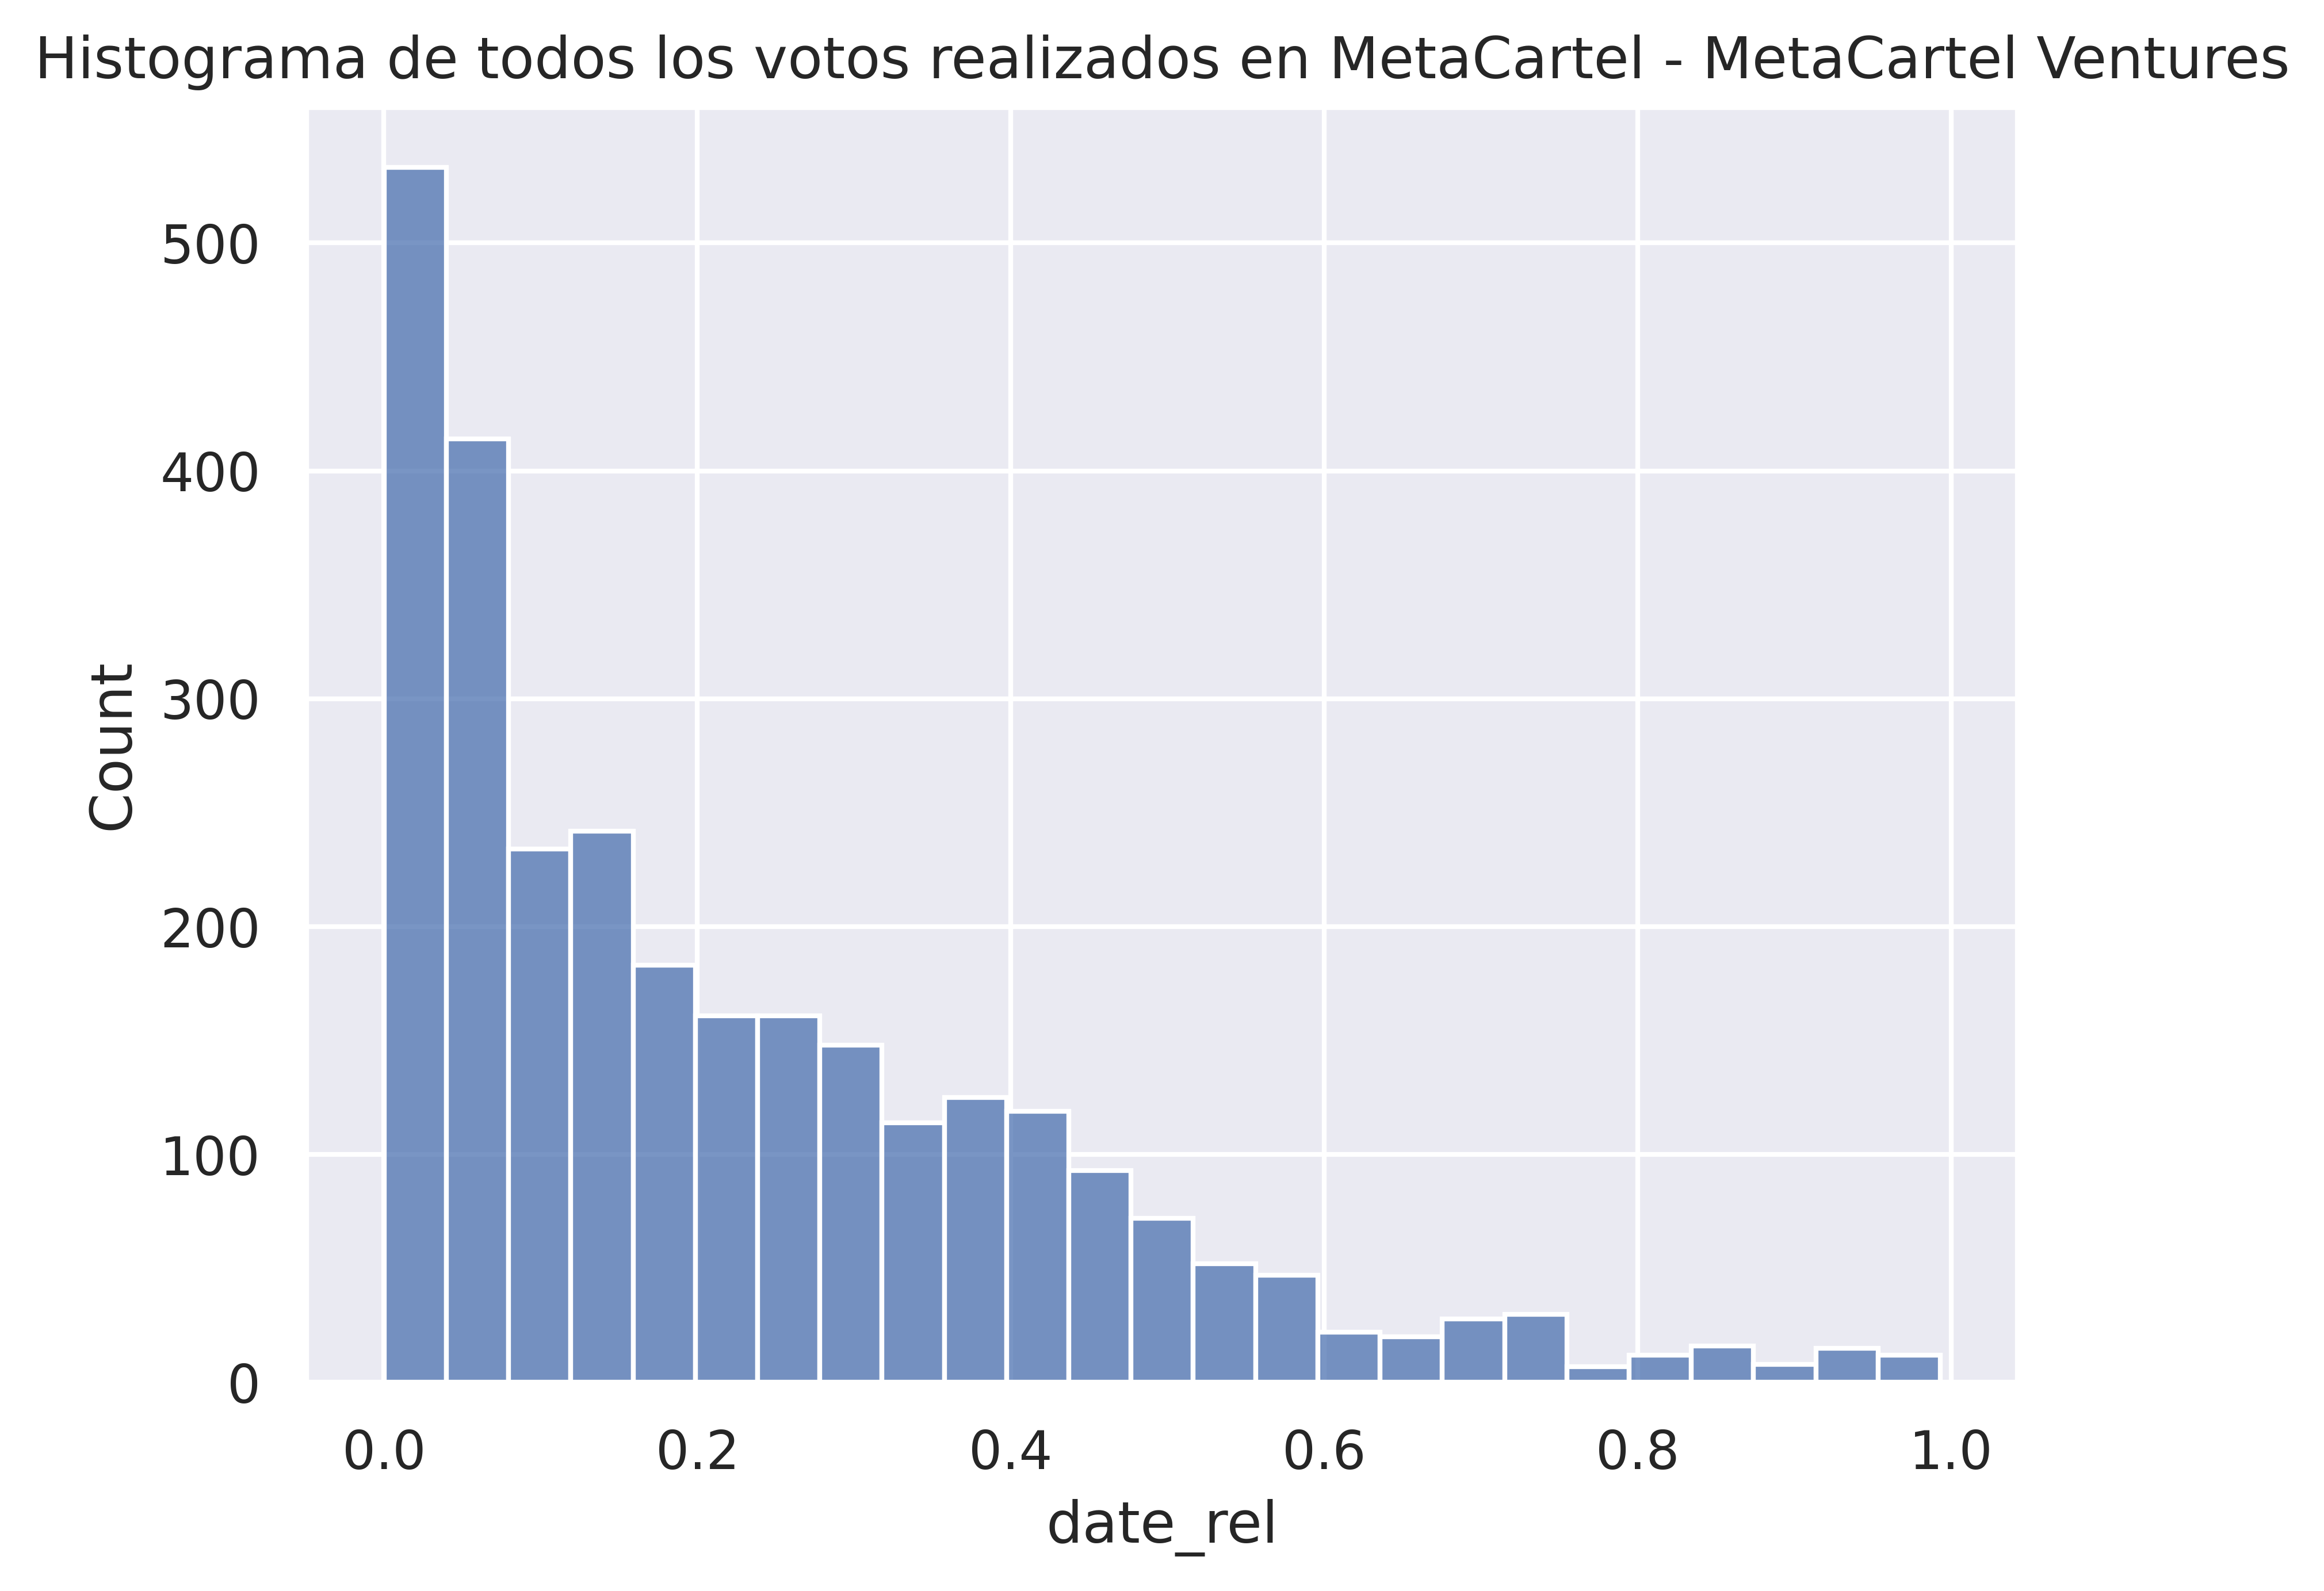

In [22]:
_dfv = dfv[['platform', 'name', 'proposal', 'date']].merge(dfp[['start', 'end']], left_on='proposal', right_index=True).sort_values('date')
_dfv['date_rel'] = (_dfv['date'] - _dfv['start']) / (_dfv['end'] - _dfv['start'])
ax = sns.histplot(_dfv, x='date_rel')
ax.set_title(f"Histograma de todos los votos realizados en {ORG_NAME}")

In [23]:
_dfv[['date_rel']].describe(percentiles=[.1,.25,.5,.75,.78,.8])

date_rel
count  2868.000000
mean      0.223137
std       0.207760
min       0.000063
10%       0.014020
25%       0.055199
50%       0.161824
75%       0.340552
78%       0.369697
80%       0.391369
max       0.993140

### Cuando son los votos (histograma distribución en tiempo de TODOS los votos)

Vamos a intentar calcular la frecuencia relativa acumulada

In [24]:
rel = (1 / _dfv.groupby('proposal').size()).rename('freq')
_dfv2 = _dfv.join(rel, on='proposal')
_dfv2['cumfreq'] = _dfv2.groupby('proposal')['freq'].cumsum()
_dfv2

platform                              name  \
164   daohaus  MetaCartel - MetaCartel Ventures   
165   daohaus  MetaCartel - MetaCartel Ventures   
188   daohaus  MetaCartel - MetaCartel Ventures   
194   daohaus  MetaCartel - MetaCartel Ventures   
198   daohaus  MetaCartel - MetaCartel Ventures   
...       ...                               ...   
1899  daohaus  MetaCartel - MetaCartel Ventures   
2426  daohaus  MetaCartel - MetaCartel Ventures   
2604  daohaus  MetaCartel - MetaCartel Ventures   
1900  daohaus  MetaCartel - MetaCartel Ventures   
1901  daohaus  MetaCartel - MetaCartel Ventures   

                                  proposal                date  \
164   a3cd7b01-435c-50cd-8d8c-75102df1027c 2019-06-06 09:49:38   
165   83841f4c-18bf-57ef-bb9f-f0383b99fd32 2019-06-07 07:03:42   
188   5c99eeb2-9854-5d2d-ba20-1ff1307ea924 2019-06-07 07:04:48   
194   fc0c49e1-5e4a-528b-92e3-42b3fb560d16 2019-06-10 10:49:11   
198   7179b537-bb7e-5677-adcd-3f44fcc78805 2019-06-10 10:49:31   
...                                    ...                 ...   
1899  52983d9e-5fd1-5afd-8c2a-936b38d65f06 2023-06-23 16:28:23   
2426  06f50c00-d777-55c6-917b-ff9c0cf7f3ce 2023-06-28 20:30:25   
2604  06f50c00-d777-55c6-917b-ff9c0cf7f3ce 2023-06-28 22:00:45   
1900  6d79288e-6319-565e-9316-3b9027f6ec8e 2023-07-07 17:52:59   
1901  2f0fb063-9b2f-5095-888b-23509c5f6cd6 2023-07-08 22:08:35   

                   start                 end  date_rel  freq  cumfreq  
164  2019-06-05 21:44:01                 NaT       NaN   1.0      1.0  
165  2019-06-06 22:14:15                 NaT       NaN   1.0      1.0  
188  2019-06-06 22:18:23                 NaT       NaN   1.0      1.0  
194  2019-06-06 22:19:43                 NaT       NaN   1.0      1.0  
198  2019-06-06 22:31:28                 NaT       NaN   1.0      1.0  
...                  ...                 ...       ...   ...      ...  
1899 2023-06-22 17:59:23 2023-07-07 14:39:35  0.063037   1.0      1.0  
2426 2023-06-28 19:25:35 2023-07-10 22:16:20  0.003715   0.5      0.5  
2604 2023-06-28 19:25:35 2023-07-10 22:16:20  0.008892   0.5      1.0  
1900 2023-07-07 14:46:47 2023-07-25 16:20:23  0.007158   1.0      1.0  
1901 2023-07-07 14:48:59 2023-07-25 16:20:59  0.072259   1.0      1.0  

[3287 rows x 9 columns]

In [25]:
_dfv2.groupby('proposal').size().sort_values()

proposal
b49ba124-db72-55f9-9169-e1f4d52943a7     1
04da8a6c-5a78-513a-b781-c34ebdde31eb     1
b8d10a35-5f40-5f93-971b-523da69cc721     1
381b24bb-f3b4-54fe-9f56-dfbc019d6c55     1
50080c64-aa83-5e05-9041-3242db96a4a3     1
                                        ..
f928de36-b292-574d-84d3-a956dca15b58    19
15c2d288-9b47-5ee3-a9a7-2c79b7fa361a    21
28f82740-1b1f-5768-954d-1ba32f456bc9    22
5ebc88c2-b806-523e-80d9-166eec2768c2    24
48b01d5f-4d4a-56a9-bd20-e18477023cac    27
Length: 934, dtype: int64


### KDE plot de las más votadas

/tmp/ipykernel_324161/2348142249.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(_toplot, x='date_rel', hue='proposal', legend=False).set_title(f"kde plot de las 15 propuestas más grandes en {ORG_NAME}")
/tmp/ipykernel_324161/2348142249.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(_toplot, x='date_rel', hue='proposal', legend=False).set_title(f"kde plot de las 15 propuestas más grandes en {ORG_NAME}")


Text(0.5, 1.0, 'kde plot de las 15 propuestas más grandes en MetaCartel - MetaCartel Ventures')

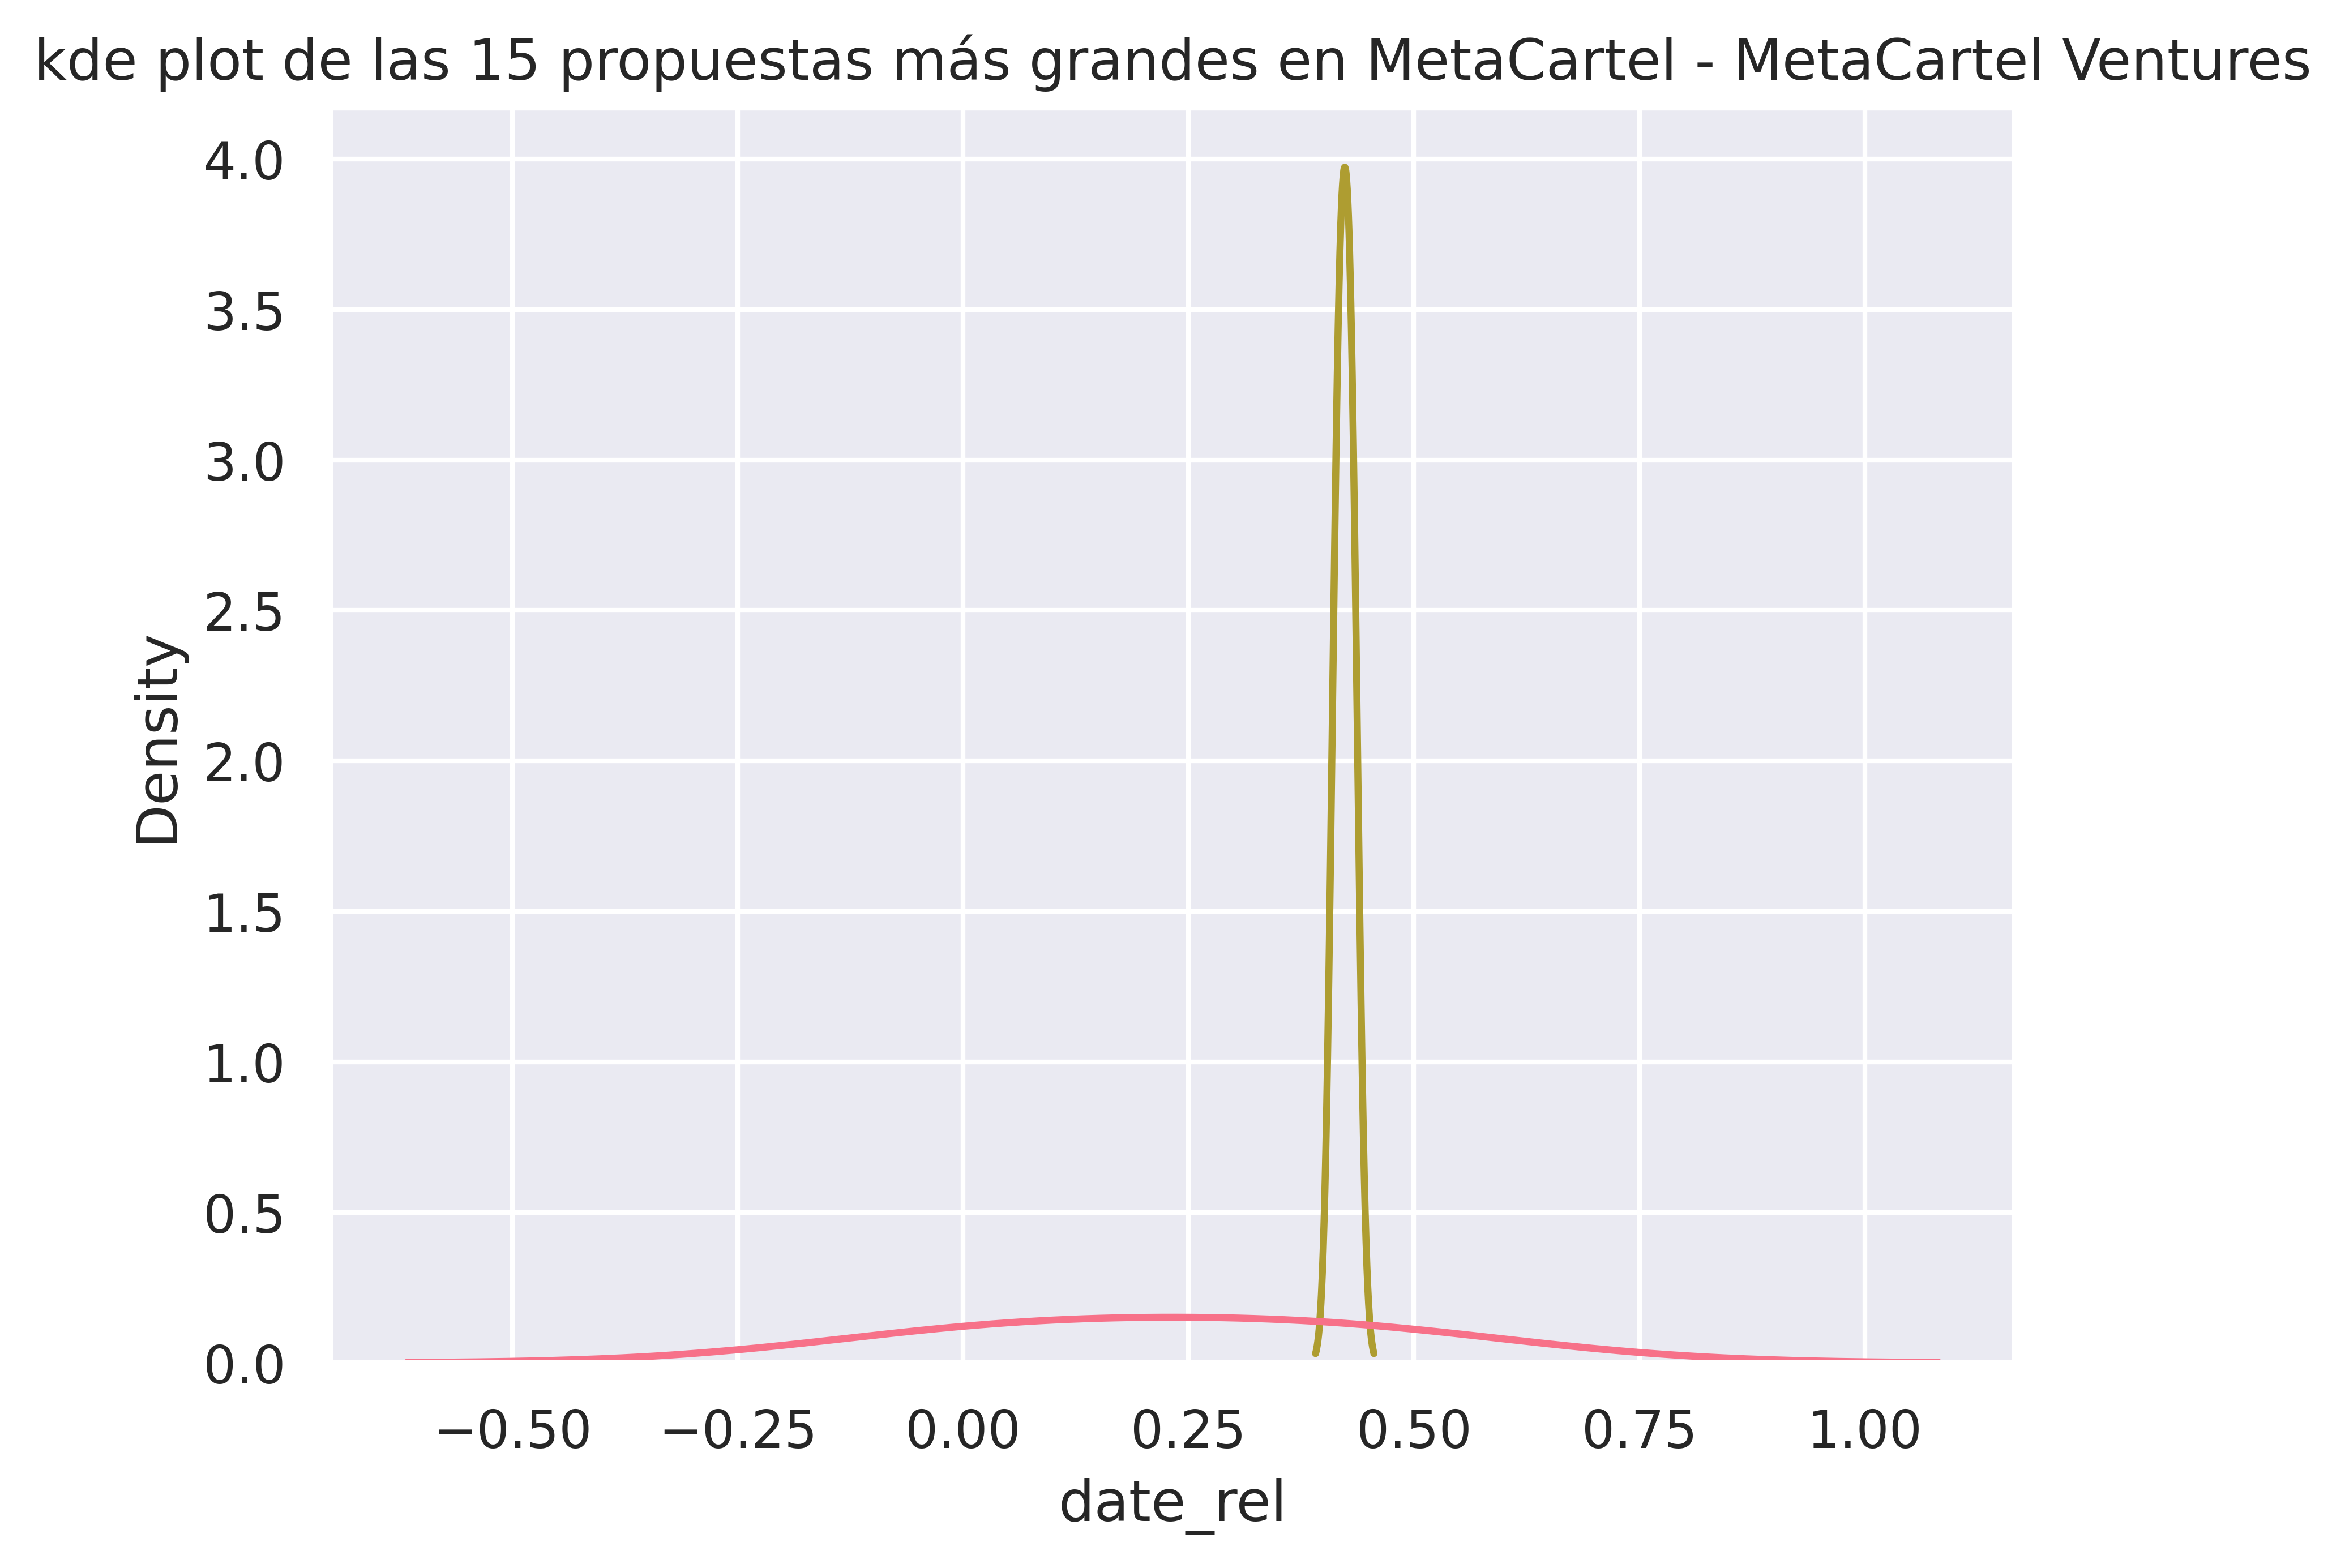

In [26]:
# Get N random proposals
# proposals = np.random.choice(_dfv2['proposal'].unique(), 15, replace=False, p=_dfv2.groupby('proposal').size() / _dfv2.groupby('proposal').size().sum())

# Get top N proposals
proposals = _dfv2.groupby('proposal').size().tail(15).index

_toplot = _dfv2[_dfv2['proposal'].isin(proposals)].copy()
_toplot['proposal'] = _toplot['proposal'].astype(str)
assert _toplot['proposal'].nunique() == len(proposals)
sns.kdeplot(_toplot, x='date_rel', hue='proposal', legend=False).set_title(f"kde plot de las 15 propuestas más grandes en {ORG_NAME}")

Efectivamente, los votos se realizan sobre todo nada más crearse la propuesta. El 25% de los votos ya han sido emitidos cuando aún queda un 95% del tiempo restante, y solo un 22% votan en la segunda mitad del tiempo disponible. Sin embargo, como podemos observar en la figura de `[kde plot de las 15 propuestas más grandes]`, hay propuestas en las que al final puede haber un pequeño repunte de actividad. Recordemos que en las DAOs el resultado de la votación es siempre visible, lo que puede sesgar la participación si los usuarios piensan que el resultado es estable y no va a cambiar.

Al partir el dataset en puntos aleatorios considerando una distribución uniforme, lo más seguro es que nos encontremos que las propuestas con las que entrenamos y testeamos (las _frontera_), tengan, en general más votos en el conjunto de entrenamiento que en el de test. Por esta razón también es necesario un sistema que sea muy resiliente al problema de cold start.